# Introduction

Anggota Kelompok HT1:
* 2106633310 - Kristo Jeremy Thady Tobing
* 2106654353 - Muhammad Reyvan Natechnoury
* 2106751442 - Rafli Wasis Anggito
* 2106752054 - Michael Baptiswa Marully Pangaribuan

Topik: EIM

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.impute import KNNImputer

from google.colab import files
from google.colab import drive

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# read dataset
eim_df = pd.read_csv("/content/drive/Shareddrives/HT1_EIM/EIM_Train.csv")
eim_df

,ticker,category,dividend_frequency,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,0P000153IG,Global Flex-Cap Equity,NaN,Value,Large,248.25,10.66,1.00,0.92,6.19,...,14.75,1.85,3.86,8.01,-8.18,-4.63,NaN,16,6,3.0
1,F00000OUR6,US Mid-Cap Equity,Annually,Blend,Medium,124.69,23.06,1.97,1.70,12.07,...,8.64,9.40,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,Annually,Growth,Large,322.70,27.99,3.04,2.71,10.35,...,12.53,6.06,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,F000005K32,US Large-Cap Blend Equity,Annually,Value,Large,229.67,17.19,1.77,0.75,6.52,...,8.15,8.10,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,F00000ZCZC,Europe Mid-Cap Equity,NaN,Growth,Medium,111.36,12.15,1.01,0.62,3.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22415,F0GBR04RWD,Europe ex-UK Small/Mid-Cap Equity,Annually,Growth,Small,34.41,19.31,1.60,0.94,4.75,...,12.85,0.91,2.66,8.59,-2.74,0.30,13.99,18,5,4.0
22416,F000002K4M,UK Equity Income,Quarterly,Value,Medium,147.61,9.63,0.90,0.46,3.72,...,11.71,-5.10,-1.47,4.91,-3.77,0.77,6.85,14,9,2.0
22417,F00000PGHH,Global Large-Cap Blend Equity,Annually,Blend,Large,280.58,23.77,1.92,1.54,9.76,...,11.60,4.26,0.27,9.79,-6.47,-5.07,6.86,18,5,3.0
22418,F00000QNV0,UK Small-Cap Equity,Annually,Growth,Small,-125.83,12.71,1.60,1.01,5.41,...,13.55,-4.49,-0.16,2.05,1.78,6.07,-4.95,17,6,4.0


In [92]:
pd.set_option('display.max_rows', 200)

# Preprocessing

In [93]:
# Check Datatype

eim_df.dtypes

ticker                                  object
category                                object
dividend_frequency                      object
equity_style                            object
equity_size                             object
equity_size_score                      float64
price_prospective_earnings             float64
price_book_ratio                       float64
price_sales_ratio                      float64
price_cash_flow_ratio                  float64
dividend_yield_factor                  float64
long_term_projected_earnings_growth    float64
historical_earnings_growth             float64
sales_growth                           float64
cash_flow_growth                       float64
book_value_growth                      float64
roa                                    float64
roe                                    float64
roic                                   float64
bond_interest_rate_sensitivity          object
bond_credit_quality                     object
average_coupo

In [94]:
eim_df

,ticker,category,dividend_frequency,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,0P000153IG,Global Flex-Cap Equity,NaN,Value,Large,248.25,10.66,1.00,0.92,6.19,...,14.75,1.85,3.86,8.01,-8.18,-4.63,NaN,16,6,3.0
1,F00000OUR6,US Mid-Cap Equity,Annually,Blend,Medium,124.69,23.06,1.97,1.70,12.07,...,8.64,9.40,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,Annually,Growth,Large,322.70,27.99,3.04,2.71,10.35,...,12.53,6.06,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,F000005K32,US Large-Cap Blend Equity,Annually,Value,Large,229.67,17.19,1.77,0.75,6.52,...,8.15,8.10,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,F00000ZCZC,Europe Mid-Cap Equity,NaN,Growth,Medium,111.36,12.15,1.01,0.62,3.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22415,F0GBR04RWD,Europe ex-UK Small/Mid-Cap Equity,Annually,Growth,Small,34.41,19.31,1.60,0.94,4.75,...,12.85,0.91,2.66,8.59,-2.74,0.30,13.99,18,5,4.0
22416,F000002K4M,UK Equity Income,Quarterly,Value,Medium,147.61,9.63,0.90,0.46,3.72,...,11.71,-5.10,-1.47,4.91,-3.77,0.77,6.85,14,9,2.0
22417,F00000PGHH,Global Large-Cap Blend Equity,Annually,Blend,Large,280.58,23.77,1.92,1.54,9.76,...,11.60,4.26,0.27,9.79,-6.47,-5.07,6.86,18,5,3.0
22418,F00000QNV0,UK Small-Cap Equity,Annually,Growth,Small,-125.83,12.71,1.60,1.01,5.41,...,13.55,-4.49,-0.16,2.05,1.78,6.07,-4.95,17,6,4.0


In [95]:
# Check Missing Values

for i in eim_df.columns:
    percentage_missing = eim_df[i].isnull().sum() / len(eim_df) * 100
    print(f"{i} : {round(percentage_missing, 2)} %")

ticker : 0.0 %
category : 0.0 %
dividend_frequency : 53.46 %
equity_style : 0.0 %
equity_size : 0.0 %
equity_size_score : 0.0 %
price_prospective_earnings : 0.03 %
price_book_ratio : 0.02 %
price_sales_ratio : 0.04 %
price_cash_flow_ratio : 0.25 %
dividend_yield_factor : 0.0 %
long_term_projected_earnings_growth : 0.0 %
historical_earnings_growth : 0.03 %
sales_growth : 0.27 %
cash_flow_growth : 0.67 %
book_value_growth : 0.24 %
roa : 0.93 %
roe : 1.09 %
roic : 6.21 %
bond_interest_rate_sensitivity : 89.8 %
bond_credit_quality : 89.8 %
average_coupon_rate : 72.93 %
average_credit_quality : 88.73 %
modified_duration : 92.29 %
effective_maturity : 91.57 %
asset_stock : 0.0 %
asset_bond : 0.0 %
asset_cash : 0.0 %
asset_other : 0.0 %
sector_basic_materials : 13.24 %
sector_consumer_cyclical : 7.19 %
sector_financial_services : 9.25 %
sector_real_estate : 24.01 %
sector_consumer_defensive : 10.82 %
sector_healthcare : 11.24 %
sector_utilities : 27.52 %
sector_communication_services : 10.02 

In [96]:
print("Rows duplicated : " + str(eim_df.duplicated().sum()))

Rows duplicated : 0


* Tidak ada duplikasi
* Terdapat banyak missing values:
  * Missing value > 30% --> drop columns
  * Numerical --> Impute using median
  * Categorial --> Impute using mode

In [97]:
# Missing value > 30%
drop_cols = []

for i in eim_df.columns:
  if (eim_df[i].isnull().sum()/len(eim_df)) > 0.3:
    drop_cols.append(i)

# Drop columns
eim_df = eim_df.drop(columns=drop_cols)
eim_df.shape

# Drop rows (has > 20 null features)
eim_df = eim_df.dropna(thresh=eim_df.shape[1] - 20 + 1)
eim_df.shape
eim_df.head()

,ticker,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,0P000153IG,Global Flex-Cap Equity,Value,Large,248.25,10.66,1.00,0.92,6.19,4.13,...,14.75,1.85,3.86,8.01,-8.18,-4.63,NaN,16,6,3.0
1,F00000OUR6,US Mid-Cap Equity,Blend,Medium,124.69,23.06,1.97,1.70,12.07,1.30,...,8.64,9.40,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,Growth,Large,322.70,27.99,3.04,2.71,10.35,0.97,...,12.53,6.06,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,F000005K32,US Large-Cap Blend Equity,Value,Large,229.67,17.19,1.77,0.75,6.52,2.73,...,8.15,8.10,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,F00000ZCZC,Europe Mid-Cap Equity,Growth,Medium,111.36,12.15,1.01,0.62,3.54,2.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,4,2.0


In [98]:
# Impute the remaining NaN columns using KNN for Numeric

numeric_cols = eim_df.select_dtypes(include='number').columns
eim_df_numeric = eim_df[numeric_cols]

eim_df[numeric_cols] = eim_df[numeric_cols].apply(lambda x: x.fillna(x.median()))

In [99]:
# Mengganti missing values dengan modus untuk kolom kategorikal
categorical_columns = eim_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    mode_value = eim_df[column].mode().iloc[0]  # Mengambil modus, bisa lebih dari satu jika ada
    eim_df[column].fillna(mode_value, inplace=True)

eim_df_categorical = eim_df[categorical_columns]
eim_df_categorical

eim_df.head()

,ticker,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,0P000153IG,Global Flex-Cap Equity,Value,Large,248.25,10.66,1.00,0.92,6.19,4.13,...,14.75,1.850,3.86,8.01,-8.18,-4.63,7.14,16,6,3.0
1,F00000OUR6,US Mid-Cap Equity,Blend,Medium,124.69,23.06,1.97,1.70,12.07,1.30,...,8.64,9.400,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,Growth,Large,322.70,27.99,3.04,2.71,10.35,0.97,...,12.53,6.060,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,F000005K32,US Large-Cap Blend Equity,Value,Large,229.67,17.19,1.77,0.75,6.52,2.73,...,8.15,8.100,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,F00000ZCZC,Europe Mid-Cap Equity,Growth,Medium,111.36,12.15,1.01,0.62,3.54,2.86,...,8.79,6.595,1.89,6.06,-5.40,-4.41,7.14,8,4,2.0


In [100]:
eim_df

,ticker,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,0P000153IG,Global Flex-Cap Equity,Value,Large,248.25,10.66,1.00,0.92,6.19,4.13,...,14.75,1.850,3.86,8.01,-8.18,-4.63,7.14,16,6,3.0
1,F00000OUR6,US Mid-Cap Equity,Blend,Medium,124.69,23.06,1.97,1.70,12.07,1.30,...,8.64,9.400,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,Growth,Large,322.70,27.99,3.04,2.71,10.35,0.97,...,12.53,6.060,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,F000005K32,US Large-Cap Blend Equity,Value,Large,229.67,17.19,1.77,0.75,6.52,2.73,...,8.15,8.100,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,F00000ZCZC,Europe Mid-Cap Equity,Growth,Medium,111.36,12.15,1.01,0.62,3.54,2.86,...,8.79,6.595,1.89,6.06,-5.40,-4.41,7.14,8,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22414,0P0000I0D0,Property - Indirect Asia,Value,Large,214.66,14.17,0.72,3.67,9.86,4.97,...,9.93,13.050,11.02,6.22,-7.60,-6.53,6.34,15,8,3.0
22415,F0GBR04RWD,Europe ex-UK Small/Mid-Cap Equity,Growth,Small,34.41,19.31,1.60,0.94,4.75,3.66,...,12.85,0.910,2.66,8.59,-2.74,0.30,13.99,18,5,4.0
22416,F000002K4M,UK Equity Income,Value,Medium,147.61,9.63,0.90,0.46,3.72,7.97,...,11.71,-5.100,-1.47,4.91,-3.77,0.77,6.85,14,9,2.0
22417,F00000PGHH,Global Large-Cap Blend Equity,Blend,Large,280.58,23.77,1.92,1.54,9.76,2.16,...,11.60,4.260,0.27,9.79,-6.47,-5.07,6.86,18,5,3.0


In [101]:
# Handling outlier

Q1 = eim_df.quantile(0.25)
Q3 = eim_df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghitung jumlah outlier per atribut
outliers_count = ((eim_df < lower_bound) | (eim_df > upper_bound)).sum()

# Menghitung persentase outlier per atribut
total_data = len(eim_df)
percentage_outliers = (outliers_count / total_data) * 100

# Menampilkan total outlier dan persentasenya
outliers_summary = pd.DataFrame({
    'Total Outliers': outliers_count,
    'Percentage Outliers': percentage_outliers
})

# Sorting the outliers_summary DataFrame by "Percentage Outliers" in descending order
outliers_summary_sorted = outliers_summary.sort_values(by='Percentage Outliers', ascending=False)

# Rounding the "Percentage Outliers" column to two decimal places
outliers_summary_sorted['Percentage Outliers'] = outliers_summary_sorted['Percentage Outliers'].round(2)

# Displaying the sorted summary
print("Sorted Summary Outliers:\n", outliers_summary_sorted)

<ipython-input-101-558eb94f5cc3>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = eim_df.quantile(0.25)
<ipython-input-101-558eb94f5cc3>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = eim_df.quantile(0.75)
<ipython-input-101-558eb94f5cc3>:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_count = ((eim_df < lower_bound) | (eim_df > upper_bound)).sum()


Sorted Summary Outliers:
                                      Total Outliers  Percentage Outliers
asset_bond                                     5104                24.02
asset_stock                                    4389                20.66
involvement_palm_oil                           4209                19.81
asset_other                                    3652                17.19
fund_return_2015                               3545                16.69
involvement_gmo                                3357                15.80
holdings_n_stock                               3352                15.78
market_cap_micro                               3330                15.67
shareclass_size                                3117                14.67
involvement_pesticides                         2970                13.98
sector_real_estate                             2940                13.84
involvement_gambling                           2804                13.20
governance_score         

# Exploratory




## 5 Besar Investment Management berdasarkan Dana Kelolaan (fund_size)



In [102]:
group_category = eim_df.groupby(['category']).mean().reset_index()

<ipython-input-102-43f27d0d1527>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_category = eim_df.groupby(['category']).mean().reset_index()


In [103]:
# Mengurutkan data berdasarkan rata-rata dana kelolaan secara descending
sorted_category = group_category.sort_values(by='fund_size', ascending=False).reset_index()
sorted_category = sorted_category.drop(columns=['index'])
top_5_fund_size = sorted_category[['category', 'fund_size']].head(5)
top_5_fund_size['fund_size'] = top_5_fund_size['fund_size'] / 1e9
top_5_fund_size.round(2)

,category,fund_size
0,Japan Large-Cap Equity,46.46
1,Global Flexible Bond - CHF Hedged,36.90
2,Global Flexible Bond - EUR Hedged,23.19
3,Global Flexible Bond - USD Hedged,22.91
4,Japan Small/Mid-Cap Equity,18.90


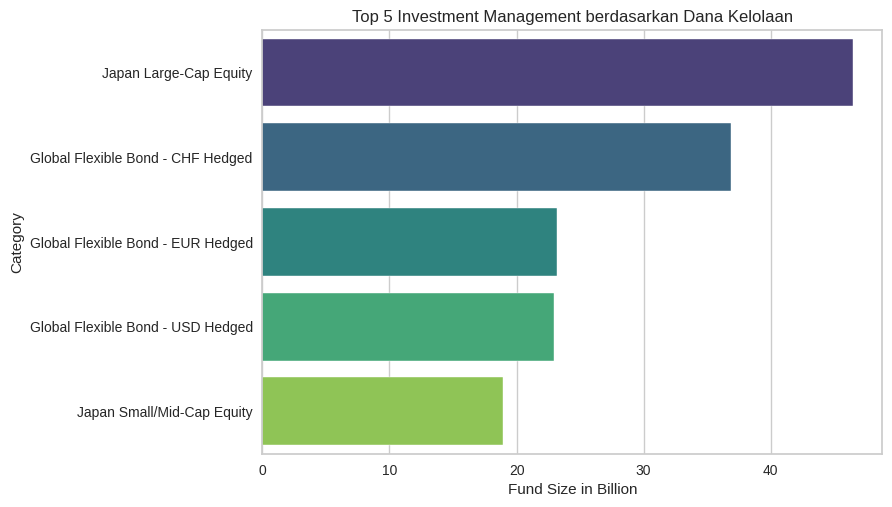

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='fund_size', y='category', data=top_5_fund_size, palette='viridis', capsize=0.1)
plt.title('Top 5 Investment Management berdasarkan Dana Kelolaan')
plt.xlabel('Fund Size in Billion')
plt.ylabel('Category')

plt.show()

Dari data dana kelolaan lima investasi teratas, terlihat bahwa **Japan Large-Cap Equity** mendominasi dengan dana kelolaan sebesar **46.46 miliar USD**, mengungguli kategori lainnya. Sementara itu, kategori Global Flexible Bond - CHF Hedged menempati posisi kedua dengan dana kelolaan sekitar 36.90 miliar USD. Selanjutnya, untuk kategori Global Flexible Bond - EUR Hedged dan Global Flexible Bond - USD Hedged memiliki dana kelolaan yang cukup dekat, masing-masing 23.19 miliar USD dan 22.91 miliar USD. Terakhir, Japan Small/Mid-Cap Equity berada di posisi kelima dengan dana kelolaan sekitar 18.90 miliar USD.

## Tunjukkan perbandingan untuk tiap sektor (sector_*)

In [105]:
## Group data by each sector

aggregations = {
    col: 'mean' for col in numeric_cols
}

aggregations.update({
    col: lambda x: x.mode().iloc[0] for col in categorical_columns
})

filtered_df = eim_df[eim_df['category'].str.startswith("Sector")]

sector_grouped = filtered_df.groupby('category').agg(
    aggregations
)

sector_grouped.drop(columns=['category', 'ticker'])

,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,historical_earnings_growth,sales_growth,cash_flow_growth,...,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating,equity_style,equity_size,nav_per_share_currency,shareclass_size_currency,fund_size_currency
category,,,,,,,,,,,,,,,,,,,,,
Sector Equity Agriculture,192.738444,20.521778,2.561778,1.020889,11.266222,2.257778,8.717556,6.038222,4.513111,8.730000,...,-2.429778,3.796222,15.733333,6.844444,3.511111,Growth,Medium,EUR,USD,EUR
Sector Equity Alternative Energy,195.117000,24.110000,2.462250,1.880000,10.565750,1.647750,10.461750,3.908500,1.966750,4.125250,...,-6.162750,11.362250,15.500000,7.450000,3.250000,Growth,Large,USD,USD,USD
Sector Equity Biotechnology,170.679706,16.802941,4.757941,6.717941,14.431471,0.530588,13.723529,25.362941,10.459412,14.198824,...,-0.217059,19.298824,13.911765,9.000000,4.058824,Growth,Medium,USD,USD,USD
Sector Equity Communications,279.359062,15.879687,1.977500,1.611875,5.900625,2.805625,10.873125,1.233125,2.339688,5.568437,...,-1.811562,7.468438,12.875000,8.375000,3.031250,Blend,Large,EUR,EUR,EUR
Sector Equity Consumer Goods & Services,288.975563,26.086755,3.890530,2.025497,14.650596,1.683576,10.604702,4.551391,6.690927,8.362185,...,-5.682252,8.441457,14.649007,6.801325,3.589404,Growth,Large,EUR,EUR,EUR
Sector Equity Ecology,211.380690,25.088506,2.756207,1.798966,12.358046,1.991609,10.288736,3.784598,3.634023,4.947931,...,-4.240230,7.920805,15.931034,5.137931,3.298851,Growth,Large,EUR,EUR,EUR
Sector Equity Energy,209.103458,18.633832,0.930374,0.606168,3.521308,8.855047,15.016355,9.718037,2.614953,12.812056,...,-5.934860,2.137570,11.364486,10.878505,2.355140,Value,Large,USD,USD,USD
Sector Equity Financial Services,230.853040,15.234720,1.242000,2.193600,8.454880,2.882240,8.406400,10.433520,1.870800,15.422080,...,-3.270320,7.641040,14.424000,7.896000,3.368000,Value,Large,EUR,EUR,EUR
Sector Equity Healthcare,251.559178,19.758699,4.134589,2.393219,15.859795,1.510479,10.354315,14.726918,9.315000,8.554521,...,-3.688562,12.966918,13.671233,8.575342,3.486301,Blend,Large,USD,USD,USD


In [106]:
selected_columns = ['category','equity_size_score', 'sales_growth',
                    'fund_trailing_return_5years']

selected_data = sector_grouped[selected_columns]

selected_data

,category,equity_size_score,sales_growth,fund_trailing_return_5years
category,,,,
Sector Equity Agriculture,Sector Equity Agriculture,192.738444,4.513111,9.182889
Sector Equity Alternative Energy,Sector Equity Alternative Energy,195.117000,1.966750,18.353250
Sector Equity Biotechnology,Sector Equity Biotechnology,170.679706,10.459412,10.777059
Sector Equity Communications,Sector Equity Communications,279.359062,2.339688,4.454375
Sector Equity Consumer Goods & Services,Sector Equity Consumer Goods & Services,288.975563,6.690927,12.379338
Sector Equity Ecology,Sector Equity Ecology,211.380690,3.634023,13.507241
Sector Equity Energy,Sector Equity Energy,209.103458,2.614953,-3.104299
Sector Equity Financial Services,Sector Equity Financial Services,230.853040,1.870800,7.009360
Sector Equity Healthcare,Sector Equity Healthcare,251.559178,9.315000,11.582466


In [107]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Sort the data by each selected column
selected_data_sorted_equity = selected_data.sort_values(by='equity_size_score', ascending=False)
selected_data_sorted_sales = selected_data.sort_values(by='sales_growth', ascending=False)
selected_data_sorted_return = selected_data.sort_values(by='fund_trailing_return_5years', ascending=False)

In [108]:
def annotate_bars(ax, data):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                    xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=9)

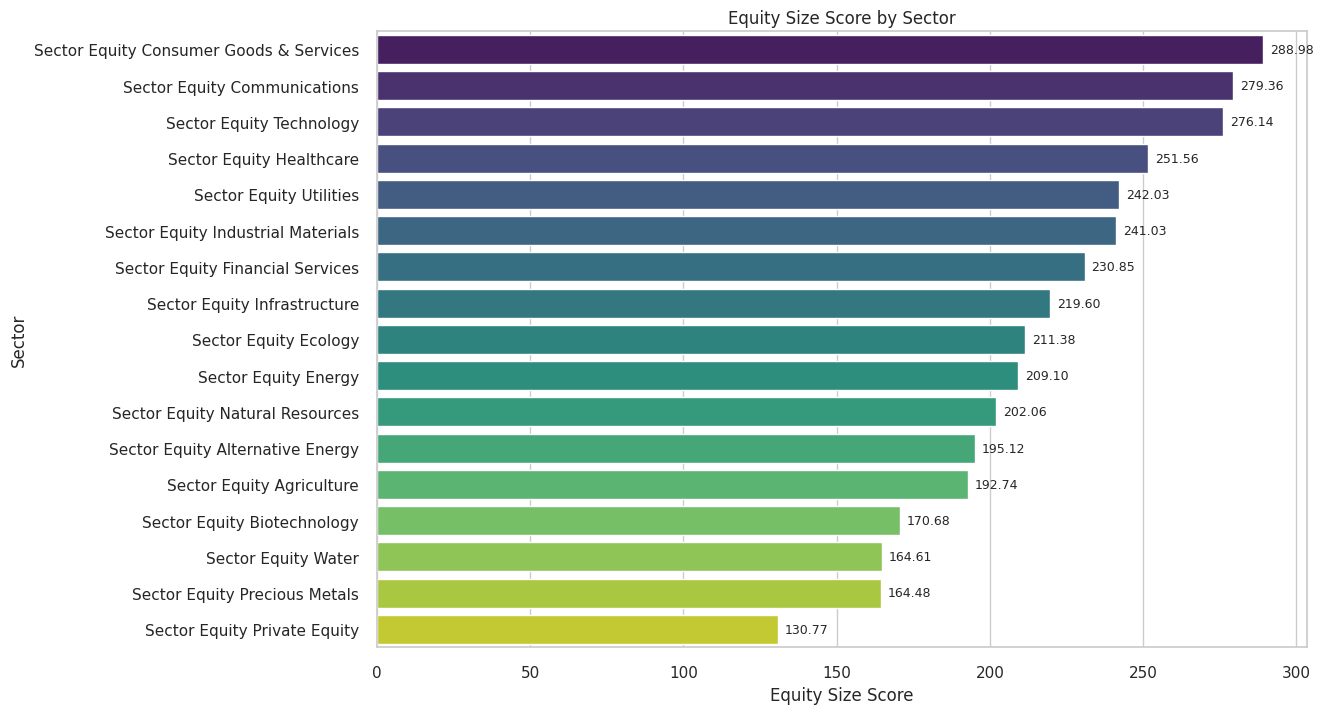

In [109]:
# Plotting for Equity Size Score
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=selected_data_sorted_equity, x='equity_size_score', y='category', palette='viridis')
plt.title('Equity Size Score by Sector')
plt.xlabel('Equity Size Score')
plt.ylabel('Sector')
annotate_bars(ax, selected_data_sorted_equity)
plt.show()

Berdasarkan Equity Size Score:
* Sector terbaik adalah **Consumer Goods & Services** dengan score 288.98.
* Sector terburuk adalah **Private Equity** dengan score 130.77.

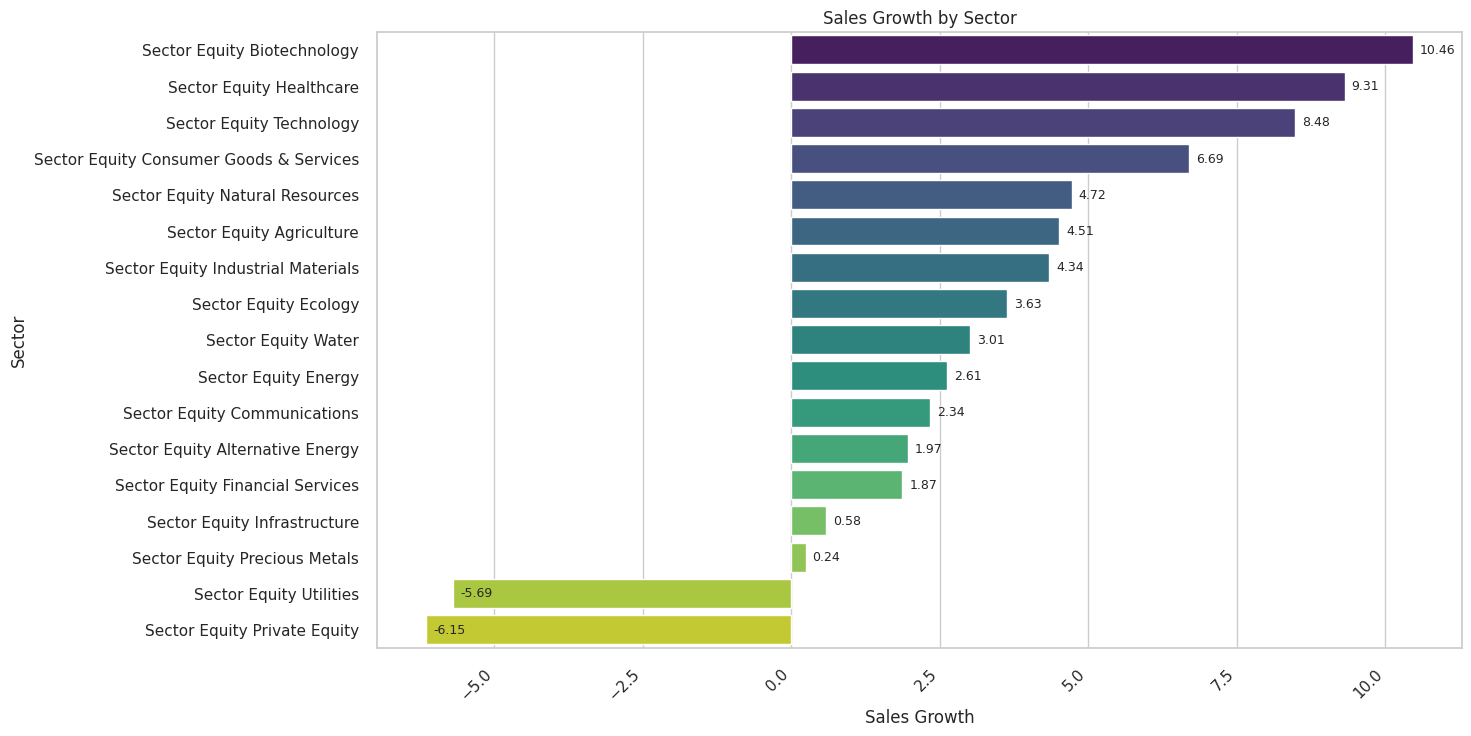

In [110]:
# Plotting for Sales Growth
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=selected_data_sorted_sales, x='sales_growth', y='category', palette='viridis')
plt.title('Sales Growth by Sector')
plt.xlabel('Sales Growth')
plt.ylabel('Sector')
plt.xticks(rotation=45, ha='right')
annotate_bars(ax, selected_data_sorted_sales)
plt.show()

Berdasarkan Sales Growth:
* Sector terbaik adalah **Biotechnology** dengan score 10.46.
* Sector terburuk adalah **Private Equity** dengan score -6.15.

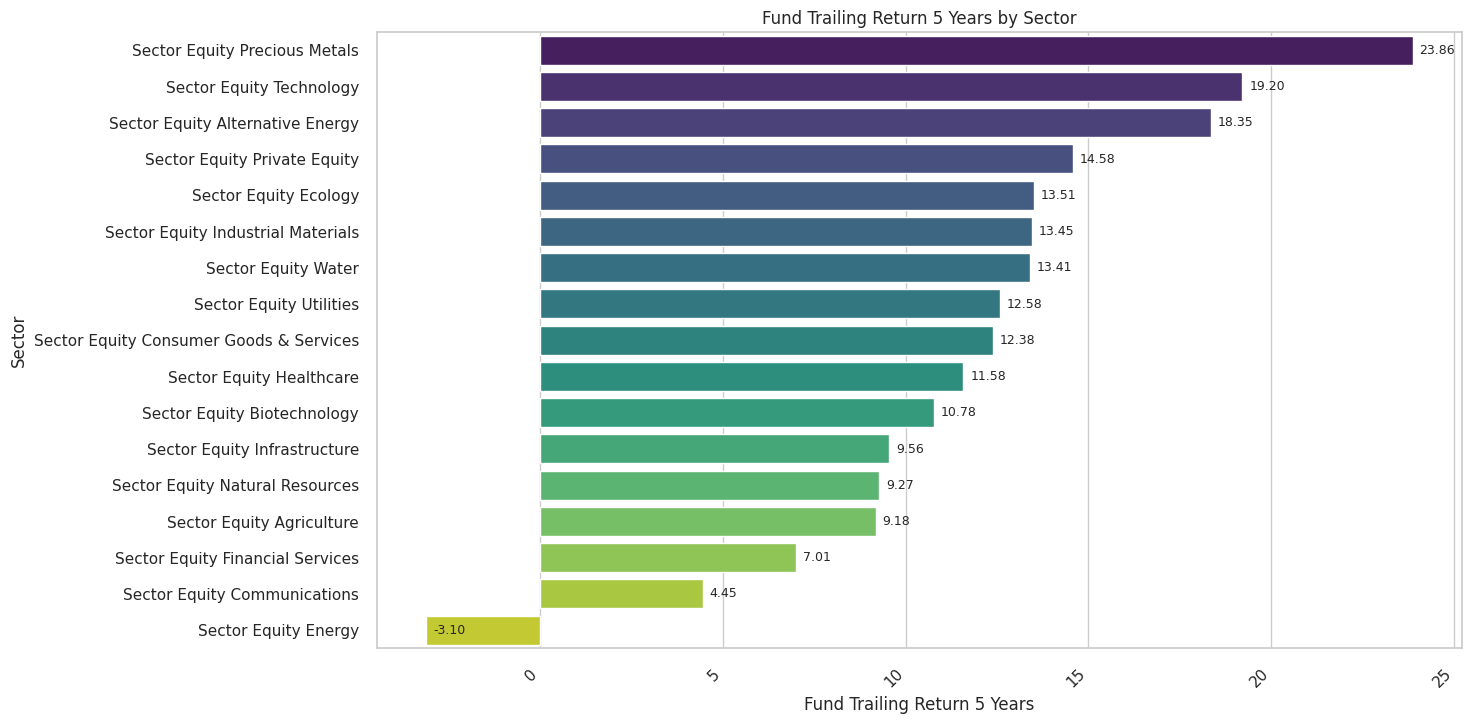

In [111]:
# Plotting for Fund Trailing Return 5 Years
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=selected_data_sorted_return, x='fund_trailing_return_5years', y='category', palette='viridis')
plt.title('Fund Trailing Return 5 Years by Sector')
plt.xlabel('Fund Trailing Return 5 Years')
plt.ylabel('Sector')
plt.xticks(rotation=45, ha='right')
annotate_bars(ax, selected_data_sorted_return)
plt.show()

Berdasarkan Fund Trailing Return 5 Years:
* Sector terbaik adalah **Precious Metal** dengan score 23.86.
* Sector terburuk adalah **Energy** dengan score -3.10.

## Apakah terdapat hubungan antara management_fees dengan pertumbuhan return investasi?

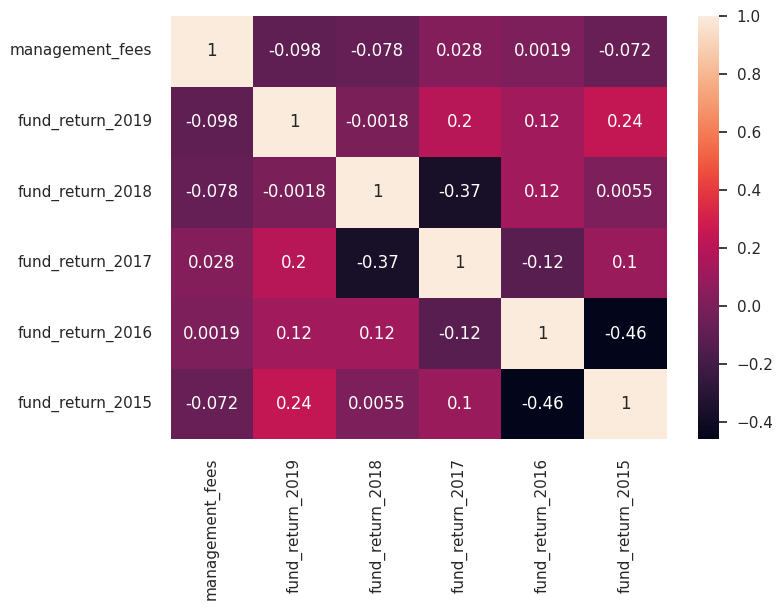

In [112]:
# Hubungan masing-masing tahun
import seaborn as sns

man_fees_ret_invs = eim_df[['management_fees', 'fund_return_2019', 'fund_return_2018', 'fund_return_2017', 'fund_return_2016', 'fund_return_2015']]
man_fees_ret_invs_heatmap = sns.heatmap(man_fees_ret_invs.corr(), annot=True)

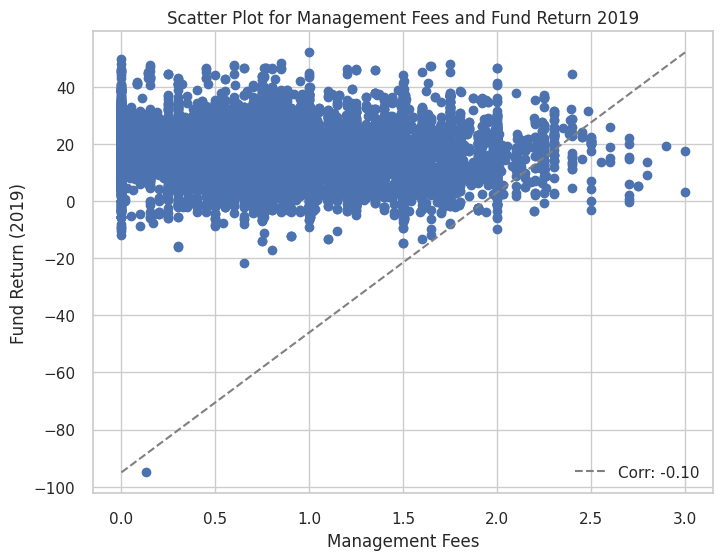

In [113]:
corr_value = eim_df['management_fees'].corr(eim_df['fund_return_2019'])
plt.figure(figsize=(8, 6))
plt.scatter(eim_df['management_fees'], eim_df['fund_return_2019'])
plt.plot([eim_df['management_fees'].min(), eim_df['management_fees'].max()],
         [eim_df['fund_return_2019'].min(), eim_df['fund_return_2019'].max()],
         linestyle='--', color='gray', label=f'Corr: {corr_value:.2f}')

plt.title('Scatter Plot for Management Fees and Fund Return 2019')
plt.xlabel('Management Fees')
plt.ylabel('Fund Return (2019)')
plt.legend()
plt.show()

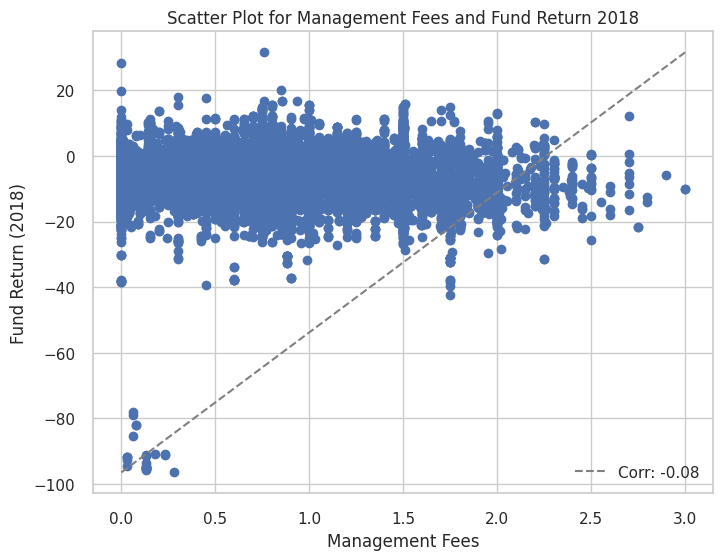

In [114]:
corr_value = eim_df['management_fees'].corr(eim_df['fund_return_2018'])
plt.figure(figsize=(8, 6))
plt.scatter(eim_df['management_fees'], eim_df['fund_return_2018'])
plt.plot([eim_df['management_fees'].min(), eim_df['management_fees'].max()],
         [eim_df['fund_return_2018'].min(), eim_df['fund_return_2018'].max()],
         linestyle='--', color='gray', label=f'Corr: {corr_value:.2f}')

plt.title('Scatter Plot for Management Fees and Fund Return 2018')
plt.xlabel('Management Fees')
plt.ylabel('Fund Return (2018)')
plt.legend()
plt.show()

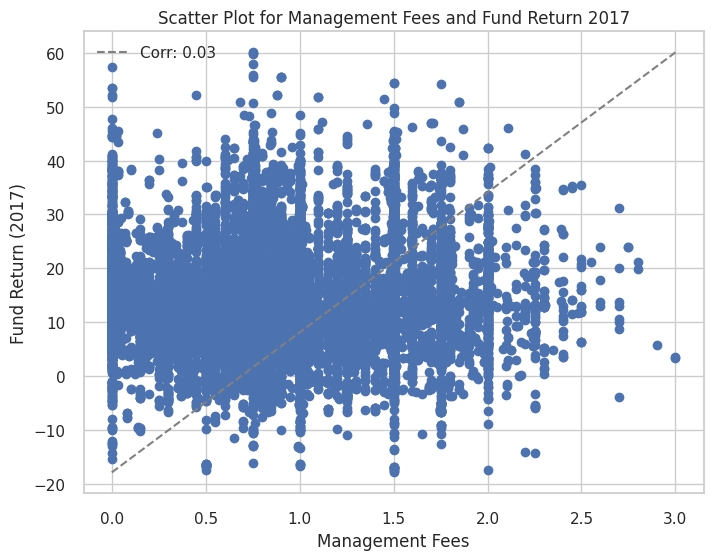

In [115]:
corr_value = eim_df['management_fees'].corr(eim_df['fund_return_2017'])
plt.figure(figsize=(8, 6))
plt.scatter(eim_df['management_fees'], eim_df['fund_return_2017'])
plt.plot([eim_df['management_fees'].min(), eim_df['management_fees'].max()],
         [eim_df['fund_return_2017'].min(), eim_df['fund_return_2017'].max()],
         linestyle='--', color='gray', label=f'Corr: {corr_value:.2f}')

plt.title('Scatter Plot for Management Fees and Fund Return 2017')
plt.xlabel('Management Fees')
plt.ylabel('Fund Return (2017)')
plt.legend()
plt.show()

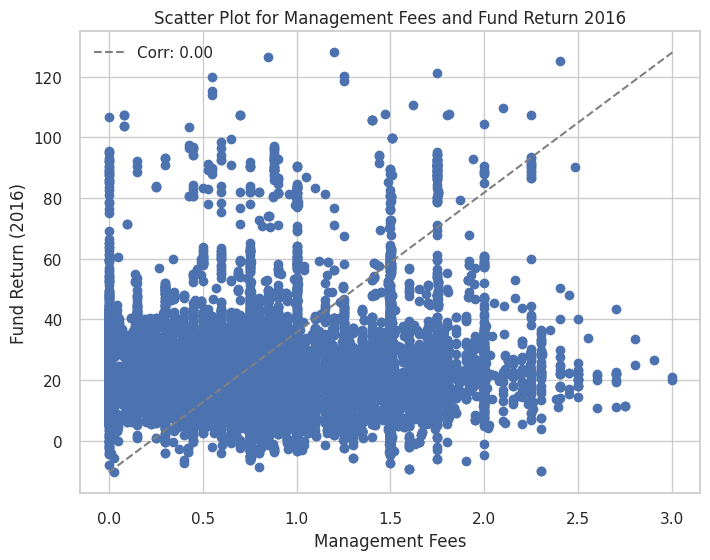

In [116]:
corr_value = eim_df['management_fees'].corr(eim_df['fund_return_2016'])
plt.figure(figsize=(8, 6))
plt.scatter(eim_df['management_fees'], eim_df['fund_return_2016'])
plt.plot([eim_df['management_fees'].min(), eim_df['management_fees'].max()],
         [eim_df['fund_return_2016'].min(), eim_df['fund_return_2016'].max()],
         linestyle='--', color='gray', label=f'Corr: {corr_value:.2f}')

plt.title('Scatter Plot for Management Fees and Fund Return 2016')
plt.xlabel('Management Fees')
plt.ylabel('Fund Return (2016)')
plt.legend()
plt.show()

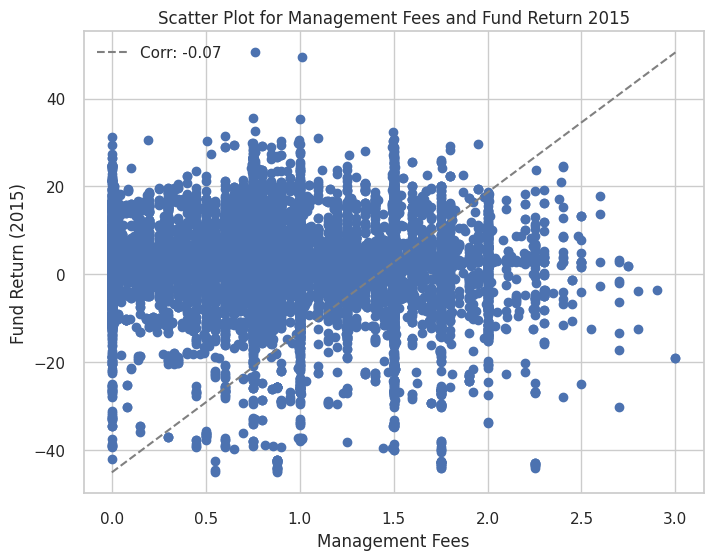

In [117]:
# Fund Return 2015
corr_value = eim_df['management_fees'].corr(eim_df['fund_return_2015'])
plt.figure(figsize=(8, 6))
plt.scatter(eim_df['management_fees'], eim_df['fund_return_2015'])
plt.plot([eim_df['management_fees'].min(), eim_df['management_fees'].max()],
         [eim_df['fund_return_2015'].min(), eim_df['fund_return_2015'].max()],
         linestyle='--', color='gray', label=f'Corr: {corr_value:.2f}')

plt.title('Scatter Plot for Management Fees and Fund Return 2015')
plt.xlabel('Management Fees')
plt.ylabel('Fund Return (2015)')
plt.legend()
plt.show()

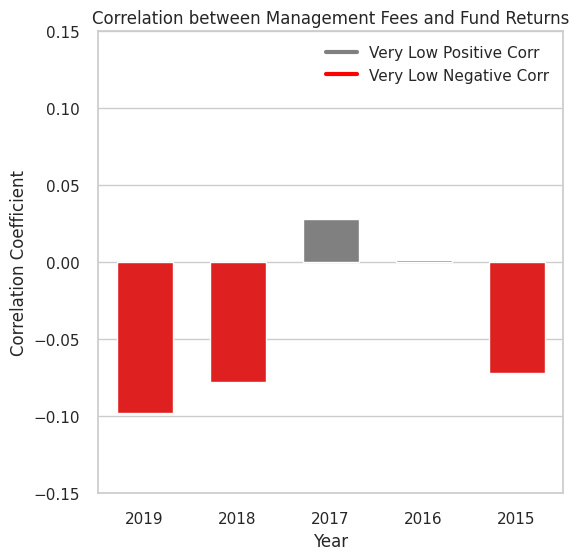

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename columns
eim_df_copy = eim_df.copy()
eim_df_copy = eim_df_copy.rename(columns={
    'fund_return_2019': '2019',
    'fund_return_2018': '2018',
    'fund_return_2017': '2017',
    'fund_return_2016': '2016',
    'fund_return_2015': '2015'
})

# Select the columns of interest
selected_columns = ['management_fees', '2019', '2018', '2017', '2016', '2015']
selected_data = eim_df_copy[selected_columns]

# Calculate correlations
correlations = selected_data.corr()

# Drop the correlation between management_fees and itself
correlations = correlations.drop('management_fees', axis=0)

# Plotting the bar plot for each correlation with customized colors, smaller bar width, and reduced gap between bars
plt.figure(figsize=(6, 6))

# Define color palette based on correlation values
colors = ['grey' if corr > 0 else 'red' for corr in correlations['management_fees'].values]

# Plot the bar chart with smaller bar width and reduced gap between bars
bars = sns.barplot(x=correlations.index, y=correlations['management_fees'].values, palette=colors, width=0.6, dodge=False)

plt.title('Correlation between Management Fees and Fund Returns')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')

# Set y-axis limits
plt.ylim(-0.15, 0.15)

# Create legend
legend_labels = ['Very Low Positive Corr', 'Very Low Negative Corr']
legend_colors = ['grey', 'red']

legend_handles = [plt.Line2D([0], [0], color=color, linewidth=3, linestyle='-') for color in legend_colors]

plt.legend(legend_handles, legend_labels, loc='upper right')

plt.show()

Tidak ada hubungan yang berarti (very low postive dan very low negative) antara management_fees dan fund_return masing-masing tahun

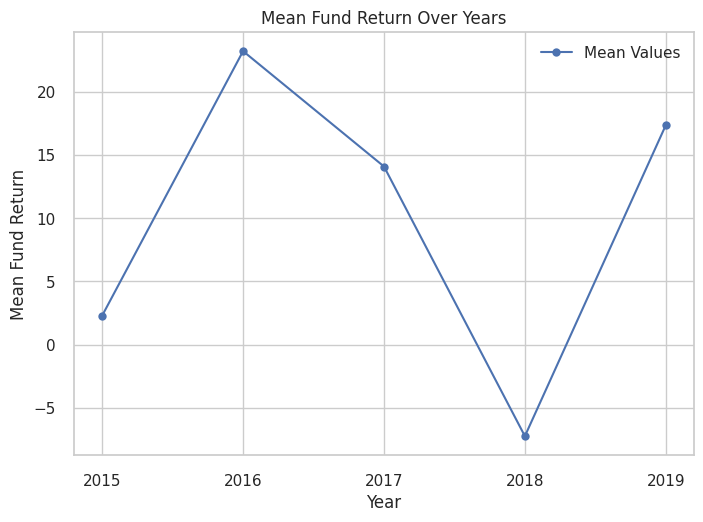

In [119]:
# Hubungan tren dari tahun ke tahun

fund_returns = np.array(eim_df[['fund_return_2015','fund_return_2016', 'fund_return_2017' ,'fund_return_2018' , 'fund_return_2019']])

# Create trend plot
mean_values = np.mean(fund_returns, axis=0)
years = ['2015', '2016', '2017', '2018', '2019']

plt.plot(years, mean_values, marker='o', linestyle='-', color='b', label='Mean Values')
plt.xlabel('Year')
plt.ylabel('Mean Fund Return')
plt.title('Mean Fund Return Over Years')
plt.legend()
plt.grid(True)
plt.show()

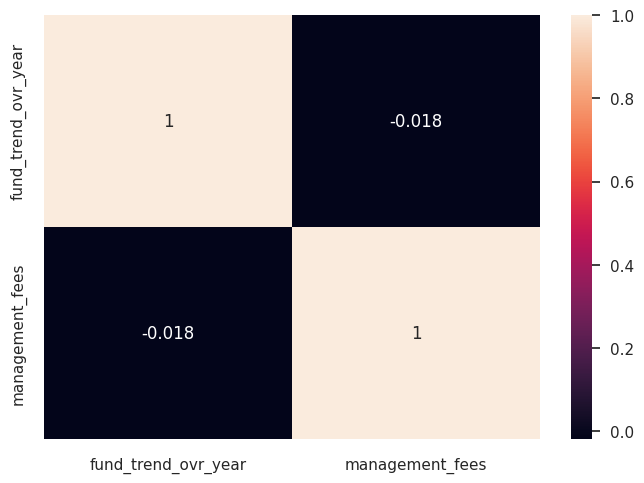

In [120]:
difference_2016_2015 = eim_df['fund_return_2016'] - eim_df['fund_return_2015']
difference_2017_2016 = eim_df['fund_return_2017'] - eim_df['fund_return_2016']
difference_2018_2017 = eim_df['fund_return_2018'] - eim_df['fund_return_2017']
difference_2019_2018 = eim_df['fund_return_2019'] - eim_df['fund_return_2018']

fund_return_trend = difference_2016_2015 + difference_2017_2016 + difference_2018_2017 + difference_2019_2018
fund_return_trend

man_fees_ret_invs_trend = pd.DataFrame()
man_fees_ret_invs_trend['fund_trend_ovr_year'] = fund_return_trend
man_fees_ret_invs_trend['management_fees'] = man_fees_ret_invs['management_fees']
man_fees_ret_invs_trend_heatmap = sns.heatmap(man_fees_ret_invs_trend.corr(), annot=True)

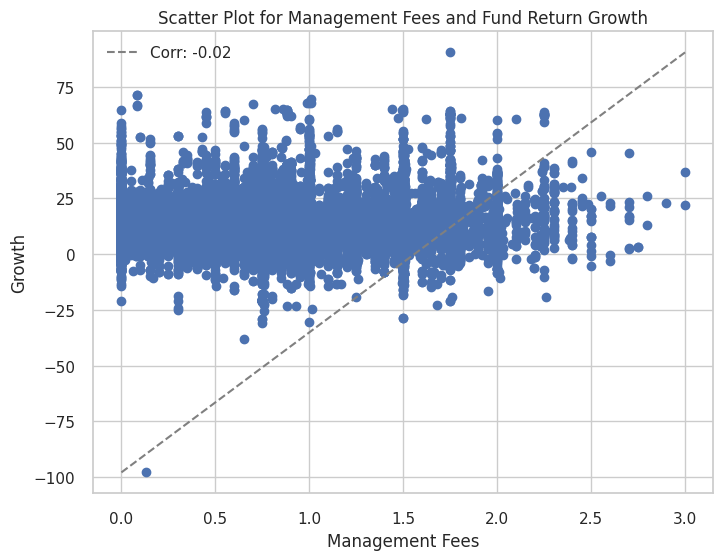

In [121]:
corr_value = eim_df['management_fees'].corr(man_fees_ret_invs_trend['fund_trend_ovr_year'])
plt.figure(figsize=(8, 6))
plt.scatter(eim_df['management_fees'], man_fees_ret_invs_trend['fund_trend_ovr_year'])
plt.plot([eim_df['management_fees'].min(), eim_df['management_fees'].max()],
         [man_fees_ret_invs_trend['fund_trend_ovr_year'].min(), man_fees_ret_invs_trend['fund_trend_ovr_year'].max()],
         linestyle='--', color='gray', label=f'Corr: {corr_value:.2f}')

plt.title('Scatter Plot for Management Fees and Fund Return Growth')
plt.xlabel('Management Fees')
plt.ylabel('Growth')
plt.legend()
plt.show()

management_fees dan growth fund return tidak memiliki hubungan yang berarti

## Perbedaan antar equity_style

Dalam mendapatkan perbedaan antar equity_style, kita hanya akan memilih kolom yang berkorelasi dengan equity_style. Setelah itu, akan dibuat plot yang memperlihatkan median dari masing-masing equity_style dengan kolom yang berkorelasi.

<ipython-input-122-df421a2e19c8>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  eim_encoded.loc[:, 'equity_style'] = eim_encoded['equity_style'].map({'Growth': 0, 'Value': 1, 'Blend': 2})
<ipython-input-122-df421a2e19c8>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  eim_encoded.loc[:, 'equity_size'] = eim_encoded['equity_size'].map({'Small': 0, 'Medium': 1, 'Large': 2})


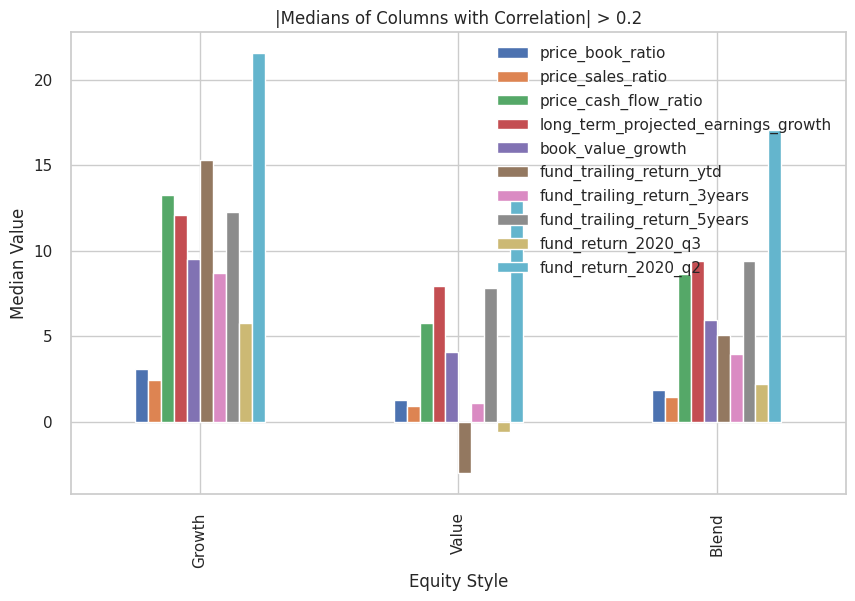

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ticker_column = eim_df['ticker']
eim_encoded = eim_df.drop(['ticker'], axis=1) # Menghapus kolom ticker karena tidak diperlukan
equity_style_df = eim_df[['equity_style']]

# Encoding equity_style dan equity_size
eim_encoded.loc[:, 'equity_style'] = eim_encoded['equity_style'].map({'Growth': 0, 'Value': 1, 'Blend': 2})
eim_encoded.loc[:, 'equity_size'] = eim_encoded['equity_size'].map({'Small': 0, 'Medium': 1, 'Large': 2})

cat_cols = eim_encoded.select_dtypes(include=['object']).columns.tolist() #Mengambil kolom data kategorikal
# Melakukan encoding pada masing-masing data kategorikal
for col in cat_cols:
    eim_encoded[col] = le.fit_transform(eim_encoded[col])

equity_style_grouped = eim_encoded.groupby('equity_style')

grouped = eim_encoded.groupby('equity_style')

corr_matrix = eim_encoded.corr()

# Extract correlations involving equity_style column
equity_style_corr = corr_matrix["equity_style"]

# Filter the columns with correlation higher than abs(0.2)
corr_columns = equity_style_corr[abs(equity_style_corr) > 0.2].index.tolist()

# Calculate the median for each column of columns with correlation higher than abs(0.2)
medians = grouped[corr_columns].median()
medians = medians.drop(columns=['equity_style'])

# Plot the medians
ax = medians.plot(kind='bar', figsize=(10, 6))
ax.set_xticklabels(['Growth', 'Value', 'Blend'])
plt.title("|Medians of Columns with Correlation| > 0.2")
plt.xlabel("Equity Style")
plt.ylabel("Median Value")
plt.legend(loc='upper right')
plt.show()

Equity style dengan performa terbaik berdasarkan fitur-fitur diatas adalah **Growth Equity Style**

## Top 5 Investment management berdasarkan equity_size_score

In [123]:
group_category = eim_df.groupby(['category']).mean().reset_index()

<ipython-input-123-43f27d0d1527>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_category = eim_df.groupby(['category']).mean().reset_index()


In [124]:
# Mengurutkan data berdasarkan rata-rata dana kelolaan secara descending
sorted_category = group_category.sort_values(by='equity_size_score', ascending=False).reset_index()
sorted_category = sorted_category.drop(columns=['index'])
top_5_equity_size = sorted_category[['category', 'equity_size_score']].head(5)
top_5_equity_size

,category,equity_size_score
0,Global Emerging Markets Corporate Bond,499.530000
1,China Equity,371.258388
2,Hong Kong Equity,362.198421
3,Asia ex-Japan Equity,352.696276
4,Greater China Allocation,351.257143


<ipython-input-125-f97fa8c724ec>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='category', x='equity_size_score', data=top_5_equity_size, palette='viridis', ci=None, capsize=0.1)


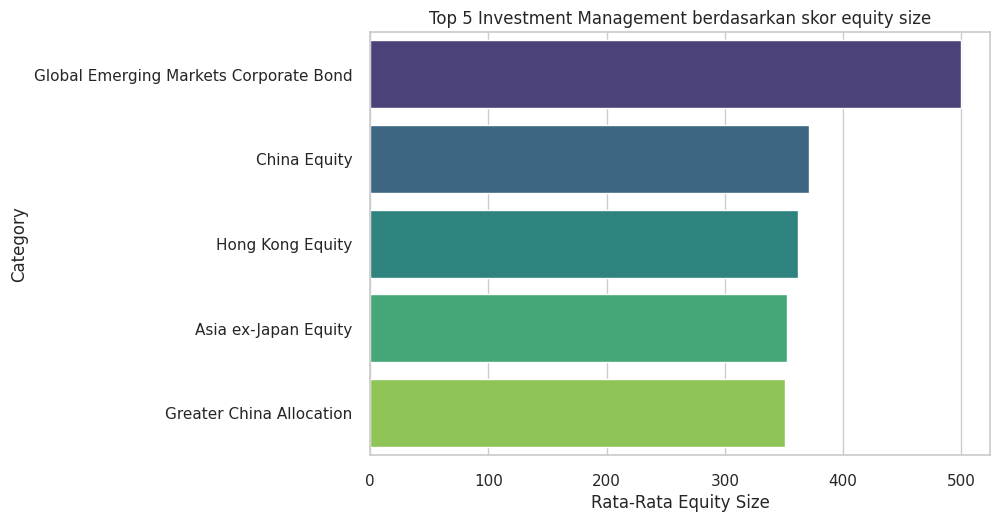

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y='category', x='equity_size_score', data=top_5_equity_size, palette='viridis', ci=None, capsize=0.1)
plt.title('Top 5 Investment Management berdasarkan skor equity size')
plt.ylabel('Category')
plt.xlabel('Rata-Rata Equity Size')

plt.show()

Dominasi Global Emerging Markets Corporate Bond: Global Emerging Markets Corporate Bond memimpin dengan rataan equity size 499.5 satuan.Persaingan Ketat antara Asia ex-japan Euqity dan Greater China Allocation: Keduanya bersaing ketat dengan masing-masing equity sekitar 352.6 satuan dan 351.2 satuan.

## Hubungan antara Fund Size dan Trailing return year to date

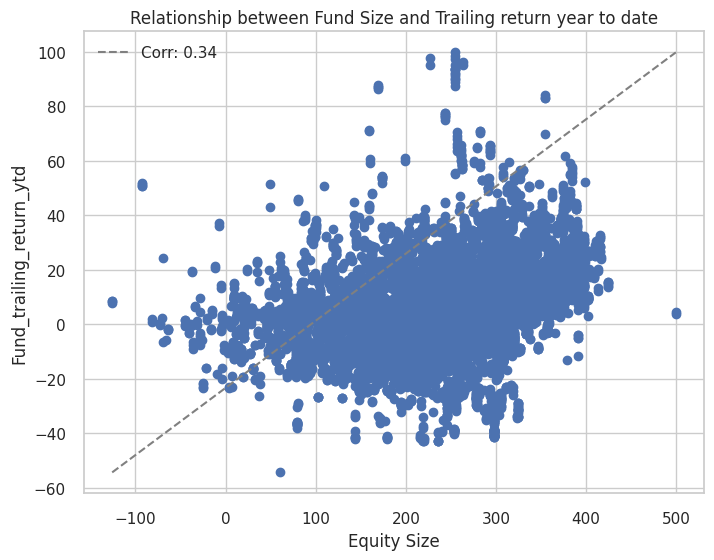

In [126]:
corr_value = eim_df['equity_size_score'].corr(eim_df['fund_trailing_return_ytd'])
plt.figure(figsize=(8, 6))
plt.scatter(eim_df['equity_size_score'], eim_df['fund_trailing_return_ytd'])
plt.plot([eim_df['equity_size_score'].min(), eim_df['equity_size_score'].max()],
         [eim_df['fund_trailing_return_ytd'].min(), eim_df['fund_trailing_return_ytd'].max()],
         linestyle='--', color='gray', label=f'Corr: {corr_value:.2f}')

plt.title('Relationship between Fund Size and Trailing return year to date')
plt.xlabel('Equity Size')
plt.ylabel('Fund_trailing_return_ytd')
plt.legend()
plt.show()

Dengan corr = 0.34 (moderate positive correlation). Maka dari itu, dapat disimpulkan bahwa fund  size memiliki hubungan dengan trailing return year to date

# Modelling

## Buatlah model untuk mengklasifikasi "rating"

In [127]:
# df_eim_train = pd.read_csv('EuropeanInvestmentManagement_train.csv')
# print(df_eim_train)

df_eim_train = eim_df.copy()

In [128]:
df_eim_train

,ticker,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,0P000153IG,Global Flex-Cap Equity,Value,Large,248.25,10.66,1.00,0.92,6.19,4.13,...,14.75,1.850,3.86,8.01,-8.18,-4.63,7.14,16,6,3.0
1,F00000OUR6,US Mid-Cap Equity,Blend,Medium,124.69,23.06,1.97,1.70,12.07,1.30,...,8.64,9.400,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,Growth,Large,322.70,27.99,3.04,2.71,10.35,0.97,...,12.53,6.060,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,F000005K32,US Large-Cap Blend Equity,Value,Large,229.67,17.19,1.77,0.75,6.52,2.73,...,8.15,8.100,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,F00000ZCZC,Europe Mid-Cap Equity,Growth,Medium,111.36,12.15,1.01,0.62,3.54,2.86,...,8.79,6.595,1.89,6.06,-5.40,-4.41,7.14,8,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22414,0P0000I0D0,Property - Indirect Asia,Value,Large,214.66,14.17,0.72,3.67,9.86,4.97,...,9.93,13.050,11.02,6.22,-7.60,-6.53,6.34,15,8,3.0
22415,F0GBR04RWD,Europe ex-UK Small/Mid-Cap Equity,Growth,Small,34.41,19.31,1.60,0.94,4.75,3.66,...,12.85,0.910,2.66,8.59,-2.74,0.30,13.99,18,5,4.0
22416,F000002K4M,UK Equity Income,Value,Medium,147.61,9.63,0.90,0.46,3.72,7.97,...,11.71,-5.100,-1.47,4.91,-3.77,0.77,6.85,14,9,2.0
22417,F00000PGHH,Global Large-Cap Blend Equity,Blend,Large,280.58,23.77,1.92,1.54,9.76,2.16,...,11.60,4.260,0.27,9.79,-6.47,-5.07,6.86,18,5,3.0


In [129]:
df_eim_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21246 entries, 0 to 22418
Data columns (total 100 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ticker                               21246 non-null  object 
 1   category                             21246 non-null  object 
 2   equity_style                         21246 non-null  object 
 3   equity_size                          21246 non-null  object 
 4   equity_size_score                    21246 non-null  float64
 5   price_prospective_earnings           21246 non-null  float64
 6   price_book_ratio                     21246 non-null  float64
 7   price_sales_ratio                    21246 non-null  float64
 8   price_cash_flow_ratio                21246 non-null  float64
 9   dividend_yield_factor                21246 non-null  float64
 10  long_term_projected_earnings_growth  21246 non-null  float64
 11  historical_earnings_growth 

In [130]:
# Check Missing Values

for i in df_eim_train.columns:
  print(i, ': ', df_eim_train[i].isnull().sum()/len(eim_df)*100, '%')

ticker :  0.0 %
category :  0.0 %
equity_style :  0.0 %
equity_size :  0.0 %
equity_size_score :  0.0 %
price_prospective_earnings :  0.0 %
price_book_ratio :  0.0 %
price_sales_ratio :  0.0 %
price_cash_flow_ratio :  0.0 %
dividend_yield_factor :  0.0 %
long_term_projected_earnings_growth :  0.0 %
historical_earnings_growth :  0.0 %
sales_growth :  0.0 %
cash_flow_growth :  0.0 %
book_value_growth :  0.0 %
roa :  0.0 %
roe :  0.0 %
roic :  0.0 %
asset_stock :  0.0 %
asset_bond :  0.0 %
asset_cash :  0.0 %
asset_other :  0.0 %
sector_basic_materials :  0.0 %
sector_consumer_cyclical :  0.0 %
sector_financial_services :  0.0 %
sector_real_estate :  0.0 %
sector_consumer_defensive :  0.0 %
sector_healthcare :  0.0 %
sector_utilities :  0.0 %
sector_communication_services :  0.0 %
sector_energy :  0.0 %
sector_industrials :  0.0 %
sector_technology :  0.0 %
market_cap_giant :  0.0 %
market_cap_large :  0.0 %
market_cap_medium :  0.0 %
market_cap_small :  0.0 %
market_cap_micro :  0.0 %
ho

In [131]:
check_null = df_eim_train.isnull().sum()

print(check_null)

ticker                                 0
category                               0
equity_style                           0
equity_size                            0
equity_size_score                      0
price_prospective_earnings             0
price_book_ratio                       0
price_sales_ratio                      0
price_cash_flow_ratio                  0
dividend_yield_factor                  0
long_term_projected_earnings_growth    0
historical_earnings_growth             0
sales_growth                           0
cash_flow_growth                       0
book_value_growth                      0
roa                                    0
roe                                    0
roic                                   0
asset_stock                            0
asset_bond                             0
asset_cash                             0
asset_other                            0
sector_basic_materials                 0
sector_consumer_cyclical               0
sector_financial

In [132]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_eim_train = df_eim_train.drop(columns=["ticker"])
df_eim_train["category"] = le.fit_transform(df_eim_train["category"]) +1
df_eim_train['equity_style'] = df_eim_train['equity_style'].replace({'Value': 1, 'Blend': 2, 'Growth': 3})
df_eim_train['equity_size'] = df_eim_train['equity_size'].replace({'Small': 10, 'Medium': 20, 'Large': 30})
df_eim_train["nav_per_share_currency"] = le.fit_transform(df_eim_train["nav_per_share_currency"]) +1
df_eim_train["shareclass_size_currency"] = le.fit_transform(df_eim_train["shareclass_size_currency"]) +1
df_eim_train["fund_size_currency"] = le.fit_transform(df_eim_train["fund_size_currency"]) +1
df_eim_train

,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,89,1,30,248.25,10.66,1.00,0.92,6.19,4.13,8.66,...,14.75,1.850,3.86,8.01,-8.18,-4.63,7.14,16,6,3.0
1,182,2,20,124.69,23.06,1.97,1.70,12.07,1.30,9.34,...,8.64,9.400,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,8,3,30,322.70,27.99,3.04,2.71,10.35,0.97,16.87,...,12.53,6.060,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,179,1,30,229.67,17.19,1.77,0.75,6.52,2.73,7.77,...,8.15,8.100,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,51,3,20,111.36,12.15,1.01,0.62,3.54,2.86,10.02,...,8.79,6.595,1.89,6.06,-5.40,-4.41,7.14,8,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22414,128,1,30,214.66,14.17,0.72,3.67,9.86,4.97,3.35,...,9.93,13.050,11.02,6.22,-7.60,-6.53,6.34,15,8,3.0
22415,55,3,10,34.41,19.31,1.60,0.94,4.75,3.66,40.12,...,12.85,0.910,2.66,8.59,-2.74,0.30,13.99,18,5,4.0
22416,173,1,20,147.61,9.63,0.90,0.46,3.72,7.97,5.04,...,11.71,-5.100,-1.47,4.91,-3.77,0.77,6.85,14,9,2.0
22417,99,2,30,280.58,23.77,1.92,1.54,9.76,2.16,9.16,...,11.60,4.260,0.27,9.79,-6.47,-5.07,6.86,18,5,3.0


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [134]:
df_eim_train.head()

,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,89,1,30,248.25,10.66,1.00,0.92,6.19,4.13,8.66,...,14.75,1.850,3.86,8.01,-8.18,-4.63,7.14,16,6,3.0
1,182,2,20,124.69,23.06,1.97,1.70,12.07,1.30,9.34,...,8.64,9.400,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,8,3,30,322.70,27.99,3.04,2.71,10.35,0.97,16.87,...,12.53,6.060,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,179,1,30,229.67,17.19,1.77,0.75,6.52,2.73,7.77,...,8.15,8.100,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,51,3,20,111.36,12.15,1.01,0.62,3.54,2.86,10.02,...,8.79,6.595,1.89,6.06,-5.40,-4.41,7.14,8,4,2.0


### Classification

In [135]:
#MULAI DARI SINI


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=20)
X_classif = df_eim_train.drop(columns=['rating'])
y_classif = df_eim_train['rating']
fit = rfe.fit(X_classif, y_classif)

selected_features = X_classif.columns[fit.support_]

eim_df_classif_selected = df_eim_train[selected_features]
eim_df_classif_selected.columns

Index(['equity_style', 'asset_stock', 'asset_bond', 'asset_cash',
       'asset_other', 'market_cap_giant', 'market_cap_large',
       'market_cap_micro', 'ongoing_cost', 'management_fees',
       'environmental_score', 'social_score', 'sustainability_rank',
       'involvement_palm_oil', 'involvement_pesticides', 'involvement_tobacco',
       'fund_trailing_return_5years', 'fund_return_2020_q1',
       'fund_return_2019_q2', 'quarters_up'],
      dtype='object')

In [136]:
def classification_metrics(prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  f1 = f1_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  precision = precision_score(y_test, prediction, average="macro")

  print('Accuracy: ' + str(accuracy))
  print('F1 Score: ' + str(f1))
  print('Recall Score: ' + str(recall))
  print('Precision Score: ' + str(precision))

In [137]:
X_classif = eim_df_classif_selected

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_classif, y_classif, test_size=0.2, random_state=42)

In [51]:
param_grid = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [None, 5, 10, 15, 20]}

rfc = RandomForestClassifier()
clf_rfc = GridSearchCV(estimator= rfc,
                   param_grid=param_grid, cv= 5)

clf_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_split': [10, 20, 50]})

In [52]:
clf_rfc.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}

In [53]:
# rfc_1 = RandomForestClassifier(**clf_rfc.best_params_)
rfc_1 = RandomForestClassifier(criterion='gini')

In [54]:
rfc_1.fit(X_train, y_train)
predicted = rfc_1.predict(X_test)
classification_metrics(predicted, y_test)

Accuracy: 0.8256470588235294
F1 Score: 0.8206189918152228
Recall Score: 0.8103210436594791
Precision Score: 0.832284959844196


In [55]:
print(predicted)

[3. 5. 4. ... 2. 4. 1.]


* **Akurasi** model adalah proporsi prediksi yang benar dari total prediksi. Dalam konteks ini, akurasi mencapai sekitar 82.56%, yang berarti sekitar 82.56% dari seluruh prediksi model benar.
* **F1 Score** adalah ukuran gabungan dari presisi (precision) dan recall. F1 Score mencapai sekitar 82.06%. F1 Score baik untuk digunakan ketika kita ingin mencari keseimbangan antara presisi dan recall, terutama ketika kelas target tidak seimbang.

### Kaggle Competititon for Classification


In [56]:
df_eim_test= pd.read_csv('EuropeanInvestmentManagement_test_classif.csv')

In [57]:
df_eim_test

,ticker,category,dividend_frequency,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
0,F00000ZI14,Global Large-Cap Blend Equity,Annually,Blend,Large,268.51,18.85,2.48,1.35,8.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,3
1,F00000Z00F,GBP Flexible Allocation,Annually,Blend,Large,306.01,22.41,2.35,1.72,9.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,3
2,F0GBR04LI4,Europe ex-UK Equity,Annually,Blend,Large,237.10,13.28,1.32,0.94,3.74,...,9.88,7.04,-1.51,-0.80,5.64,-6.99,-4.08,9.14,13,10
3,F00000XGZ9,US Small-Cap Equity,NaN,Value,Small,32.58,13.85,1.12,0.75,5.14,...,20.38,13.93,NaN,NaN,NaN,NaN,NaN,NaN,11,6
4,F0GBR04HV5,Property - Indirect Global,Quarterly,Blend,Medium,180.89,25.22,1.38,4.20,7.11,...,0.96,5.17,10.44,4.87,6.19,-3.98,-8.16,7.68,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,0P0001BO8V,Sector Equity Technology,NaN,Growth,Large,287.74,34.78,5.65,4.43,23.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,3
2798,FOGBR05KM2,EUR Flexible Allocation - Global,NaN,Blend,Large,261.29,19.13,1.74,1.40,8.27,...,4.01,5.52,NaN,NaN,NaN,NaN,NaN,NaN,10,7
2799,F0GBR06ODW,UK Small-Cap Equity,Annually,Growth,Small,-69.11,21.13,2.24,1.16,7.95,...,6.46,13.49,-4.96,-0.46,7.70,5.74,15.27,2.61,15,8
2800,F00000P2T2,GBP Moderately Adventurous Allocation,Annually,Blend,Medium,188.56,16.05,1.33,0.95,6.43,...,1.96,10.49,0.35,-0.38,5.87,-5.64,-1.34,6.66,17,6


In [58]:
# Check Missing Values

for i in df_eim_test.columns:
  print(i, ': ', df_eim_test[i].isnull().sum()/len(df_eim_test)*100, '%')

ticker :  0.0 %
category :  0.0 %
dividend_frequency :  52.498215560314065 %
equity_style :  0.0 %
equity_size :  0.0 %
equity_size_score :  0.0 %
price_prospective_earnings :  0.0 %
price_book_ratio :  0.0 %
price_sales_ratio :  0.0 %
price_cash_flow_ratio :  0.10706638115631692 %
dividend_yield_factor :  0.0 %
long_term_projected_earnings_growth :  0.0 %
historical_earnings_growth :  0.07137758743754462 %
sales_growth :  0.35688793718772305 %
cash_flow_growth :  0.7851534618129907 %
book_value_growth :  0.35688793718772305 %
roa :  0.820842255531763 %
roe :  0.9279086366880799 %
roic :  6.5310492505353315 %
bond_interest_rate_sensitivity :  88.86509635974305 %
bond_credit_quality :  88.86509635974305 %
average_coupon_rate :  70.44967880085653 %
average_credit_quality :  87.61598857958602 %
modified_duration :  91.29193433261956 %
effective_maturity :  90.72091363311921 %
asset_stock :  0.0 %
asset_bond :  0.0 %
asset_cash :  0.0 %
asset_other :  0.0 %
sector_basic_materials :  13.240

In [59]:
print("Rows duplicated : " + str(df_eim_test.duplicated().sum()))

Rows duplicated : 0


In [60]:
# Missing value > 30%
drop_cols = []

for i in df_eim_test.columns:
  if (df_eim_test[i].isnull().sum()/len(df_eim_test)) > 0.3:
    drop_cols.append(i)

# Drop columns
df_eim_test = df_eim_test.drop(columns=drop_cols)
df_eim_test.shape
df_eim_test

,ticker,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
0,F00000ZI14,Global Large-Cap Blend Equity,Blend,Large,268.51,18.85,2.48,1.35,8.13,2.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,3
1,F00000Z00F,GBP Flexible Allocation,Blend,Large,306.01,22.41,2.35,1.72,9.87,2.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,3
2,F0GBR04LI4,Europe ex-UK Equity,Blend,Large,237.10,13.28,1.32,0.94,3.74,3.97,...,9.88,7.04,-1.51,-0.80,5.64,-6.99,-4.08,9.14,13,10
3,F00000XGZ9,US Small-Cap Equity,Value,Small,32.58,13.85,1.12,0.75,5.14,2.78,...,20.38,13.93,NaN,NaN,NaN,NaN,NaN,NaN,11,6
4,F0GBR04HV5,Property - Indirect Global,Blend,Medium,180.89,25.22,1.38,4.20,7.11,3.48,...,0.96,5.17,10.44,4.87,6.19,-3.98,-8.16,7.68,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,0P0001BO8V,Sector Equity Technology,Growth,Large,287.74,34.78,5.65,4.43,23.35,0.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,3
2798,FOGBR05KM2,EUR Flexible Allocation - Global,Blend,Large,261.29,19.13,1.74,1.40,8.27,3.18,...,4.01,5.52,NaN,NaN,NaN,NaN,NaN,NaN,10,7
2799,F0GBR06ODW,UK Small-Cap Equity,Growth,Small,-69.11,21.13,2.24,1.16,7.95,0.97,...,6.46,13.49,-4.96,-0.46,7.70,5.74,15.27,2.61,15,8
2800,F00000P2T2,GBP Moderately Adventurous Allocation,Blend,Medium,188.56,16.05,1.33,0.95,6.43,3.77,...,1.96,10.49,0.35,-0.38,5.87,-5.64,-1.34,6.66,17,6


In [61]:
# Check Missing Values

for i in df_eim_test.columns:
  print(i, ': ', df_eim_test[i].isnull().sum()/len(df_eim_test)*100, '%')

ticker :  0.0 %
category :  0.0 %
equity_style :  0.0 %
equity_size :  0.0 %
equity_size_score :  0.0 %
price_prospective_earnings :  0.0 %
price_book_ratio :  0.0 %
price_sales_ratio :  0.0 %
price_cash_flow_ratio :  0.10706638115631692 %
dividend_yield_factor :  0.0 %
long_term_projected_earnings_growth :  0.0 %
historical_earnings_growth :  0.07137758743754462 %
sales_growth :  0.35688793718772305 %
cash_flow_growth :  0.7851534618129907 %
book_value_growth :  0.35688793718772305 %
roa :  0.820842255531763 %
roe :  0.9279086366880799 %
roic :  6.5310492505353315 %
asset_stock :  0.0 %
asset_bond :  0.0 %
asset_cash :  0.0 %
asset_other :  0.0 %
sector_basic_materials :  13.240542469664526 %
sector_consumer_cyclical :  7.209136331192005 %
sector_financial_services :  9.493219129193434 %
sector_real_estate :  22.91220556745182 %
sector_consumer_defensive :  11.384725196288366 %
sector_healthcare :  10.885082084225553 %
sector_utilities :  28.15845824411135 %
sector_communication_servi

In [62]:
# Impute the remaining NaN columns using KNN for Numeric

numeric_cols = df_eim_test.select_dtypes(include='number').columns
numeric_df = df_eim_test[numeric_cols]

df_eim_test[numeric_cols] = df_eim_test[numeric_cols].apply(lambda x: x.fillna(x.median()))

In [63]:
# Mengganti missing values dengan modus untuk kolom kategorikal
categorical_columns = df_eim_test.select_dtypes(include=['object']).columns
for column in categorical_columns:
    mode_value = df_eim_test[column].mode().iloc[0]  # Mengambil modus, bisa lebih dari satu jika ada
    df_eim_test[column].fillna(mode_value, inplace=True)

df_eim_test_categorical = df_eim_test[categorical_columns]
df_eim_test

,ticker,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
0,F00000ZI14,Global Large-Cap Blend Equity,Blend,Large,268.51,18.85,2.48,1.35,8.13,2.48,...,3.04,8.69,6.50,1.915,5.98,-5.135,-4.365,6.98,9,3
1,F00000Z00F,GBP Flexible Allocation,Blend,Large,306.01,22.41,2.35,1.72,9.87,2.16,...,3.04,8.69,6.50,1.915,5.98,-5.135,-4.365,6.98,9,3
2,F0GBR04LI4,Europe ex-UK Equity,Blend,Large,237.10,13.28,1.32,0.94,3.74,3.97,...,9.88,7.04,-1.51,-0.800,5.64,-6.990,-4.080,9.14,13,10
3,F00000XGZ9,US Small-Cap Equity,Value,Small,32.58,13.85,1.12,0.75,5.14,2.78,...,20.38,13.93,6.50,1.915,5.98,-5.135,-4.365,6.98,11,6
4,F0GBR04HV5,Property - Indirect Global,Blend,Medium,180.89,25.22,1.38,4.20,7.11,3.48,...,0.96,5.17,10.44,4.870,6.19,-3.980,-8.160,7.68,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,0P0001BO8V,Sector Equity Technology,Growth,Large,287.74,34.78,5.65,4.43,23.35,0.98,...,3.04,8.69,6.50,1.915,5.98,-5.135,-4.365,6.98,8,3
2798,FOGBR05KM2,EUR Flexible Allocation - Global,Blend,Large,261.29,19.13,1.74,1.40,8.27,3.18,...,4.01,5.52,6.50,1.915,5.98,-5.135,-4.365,6.98,10,7
2799,F0GBR06ODW,UK Small-Cap Equity,Growth,Small,-69.11,21.13,2.24,1.16,7.95,0.97,...,6.46,13.49,-4.96,-0.460,7.70,5.740,15.270,2.61,15,8
2800,F00000P2T2,GBP Moderately Adventurous Allocation,Blend,Medium,188.56,16.05,1.33,0.95,6.43,3.77,...,1.96,10.49,0.35,-0.380,5.87,-5.640,-1.340,6.66,17,6


In [64]:
# Check Missing Values

for i in df_eim_test.columns:
  print(i, ': ', df_eim_test[i].isnull().sum()/len(df_eim_test)*100, '%')

ticker :  0.0 %
category :  0.0 %
equity_style :  0.0 %
equity_size :  0.0 %
equity_size_score :  0.0 %
price_prospective_earnings :  0.0 %
price_book_ratio :  0.0 %
price_sales_ratio :  0.0 %
price_cash_flow_ratio :  0.0 %
dividend_yield_factor :  0.0 %
long_term_projected_earnings_growth :  0.0 %
historical_earnings_growth :  0.0 %
sales_growth :  0.0 %
cash_flow_growth :  0.0 %
book_value_growth :  0.0 %
roa :  0.0 %
roe :  0.0 %
roic :  0.0 %
asset_stock :  0.0 %
asset_bond :  0.0 %
asset_cash :  0.0 %
asset_other :  0.0 %
sector_basic_materials :  0.0 %
sector_consumer_cyclical :  0.0 %
sector_financial_services :  0.0 %
sector_real_estate :  0.0 %
sector_consumer_defensive :  0.0 %
sector_healthcare :  0.0 %
sector_utilities :  0.0 %
sector_communication_services :  0.0 %
sector_energy :  0.0 %
sector_industrials :  0.0 %
sector_technology :  0.0 %
market_cap_giant :  0.0 %
market_cap_large :  0.0 %
market_cap_medium :  0.0 %
market_cap_small :  0.0 %
market_cap_micro :  0.0 %
ho

In [65]:
# Feature selection

df_eim_test_classif = df_eim_test.copy()

df_eim_test_classif = df_eim_test_classif.drop(columns=["ticker"])
df_eim_test_classif["category"] = le.fit_transform(df_eim_test_classif["category"]) +1
df_eim_test_classif['equity_style'] = df_eim_test_classif['equity_style'].replace({'Value': 1, 'Blend': 2, 'Growth': 3})
df_eim_test_classif['equity_size'] = df_eim_test_classif['equity_size'].replace({'Small': 10, 'Medium': 20, 'Large': 30})
df_eim_test_classif["nav_per_share_currency"] = le.fit_transform(df_eim_test_classif["nav_per_share_currency"]) +1
df_eim_test_classif["shareclass_size_currency"] = le.fit_transform(df_eim_test_classif["shareclass_size_currency"]) +1
df_eim_test_classif["fund_size_currency"] = le.fit_transform(df_eim_test_classif["fund_size_currency"]) +1
df_eim_test_classif

,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
0,87,2,30,268.51,18.85,2.48,1.35,8.13,2.48,8.20,...,3.04,8.69,6.50,1.915,5.98,-5.135,-4.365,6.98,9,3
1,58,2,30,306.01,22.41,2.35,1.72,9.87,2.16,10.00,...,3.04,8.69,6.50,1.915,5.98,-5.135,-4.365,6.98,9,3
2,46,2,30,237.10,13.28,1.32,0.94,3.74,3.97,8.60,...,9.88,7.04,-1.51,-0.800,5.64,-6.990,-4.080,9.14,13,10
3,154,1,10,32.58,13.85,1.12,0.75,5.14,2.78,10.77,...,20.38,13.93,6.50,1.915,5.98,-5.135,-4.365,6.98,11,6
4,111,2,20,180.89,25.22,1.38,4.20,7.11,3.48,7.01,...,0.96,5.17,10.44,4.870,6.19,-3.980,-8.160,7.68,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,129,3,30,287.74,34.78,5.65,4.43,23.35,0.98,15.73,...,3.04,8.69,6.50,1.915,5.98,-5.135,-4.365,6.98,8,3
2798,30,2,30,261.29,19.13,1.74,1.40,8.27,3.18,8.15,...,4.01,5.52,6.50,1.915,5.98,-5.135,-4.365,6.98,10,7
2799,148,3,10,-69.11,21.13,2.24,1.16,7.95,0.97,14.74,...,6.46,13.49,-4.96,-0.460,7.70,5.740,15.270,2.61,15,8
2800,61,2,20,188.56,16.05,1.33,0.95,6.43,3.77,10.26,...,1.96,10.49,0.35,-0.380,5.87,-5.640,-1.340,6.66,17,6


In [66]:
eim_test_df_classif_selected = df_eim_test_classif[['equity_style', 'asset_stock', 'asset_bond', 'asset_cash',
       'asset_other', 'market_cap_giant', 'market_cap_large',
       'market_cap_micro', 'ongoing_cost', 'management_fees',
       'environmental_score', 'social_score', 'sustainability_rank',
       'involvement_palm_oil', 'involvement_pesticides', 'involvement_tobacco',
       'fund_trailing_return_5years', 'fund_return_2020_q1',
       'fund_return_2019_q2', 'quarters_up']]
eim_test_df_classif_selected

,equity_style,asset_stock,asset_bond,asset_cash,asset_other,market_cap_giant,market_cap_large,market_cap_micro,ongoing_cost,management_fees,environmental_score,social_score,sustainability_rank,involvement_palm_oil,involvement_pesticides,involvement_tobacco,fund_trailing_return_5years,fund_return_2020_q1,fund_return_2019_q2,quarters_up
0,2,99.85,0.00,-0.98,1.13,38.68,35.03,0.00,1.1500,0.80,2.95,10.19,4.0,0.00,0.00,0.01,9.41,-13.46,5.01,9
1,2,81.45,15.31,3.23,0.01,53.33,33.39,0.00,0.8400,0.70,4.36,10.30,4.0,0.08,0.28,0.27,9.41,-14.01,4.22,9
2,2,96.27,0.00,3.73,0.00,36.73,31.76,1.17,1.6500,0.00,4.10,7.89,3.0,0.00,0.10,0.13,5.09,-19.50,9.62,13
3,1,99.17,0.00,0.83,0.00,0.00,0.00,29.00,0.9500,0.85,4.51,9.52,3.0,0.00,0.29,0.67,9.41,-31.64,3.59,11
4,2,97.45,0.00,2.55,0.00,5.28,27.71,0.73,2.2300,1.25,4.09,5.17,2.0,0.00,0.00,0.00,10.11,-15.66,5.23,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,3,94.90,0.00,5.10,0.00,48.82,33.06,0.28,1.4700,1.30,4.06,8.56,3.0,0.00,0.00,0.00,9.41,-10.50,6.57,8
2798,2,27.43,52.01,5.99,14.57,36.66,38.68,-0.59,1.6800,1.25,4.51,9.52,3.0,0.02,0.31,0.44,9.41,-10.63,5.01,10
2799,3,81.76,0.00,18.24,0.00,0.00,0.00,90.58,1.6568,1.50,4.51,9.52,3.0,0.00,0.00,0.01,9.49,-25.35,1.28,15
2800,2,57.97,16.63,3.60,21.80,19.79,24.54,5.94,1.7600,0.75,4.51,9.52,3.0,0.07,0.25,2.15,5.63,-19.56,3.28,17


In [67]:
y_test_res = rfc_1.predict(eim_test_df_classif_selected)
y_test_res

array([3., 3., 2., ..., 3., 2., 3.])

In [68]:
res = pd.DataFrame()
res['ticker'] = df_eim_test['ticker']
res['rating'] = y_test_res
res.to_csv("classif_result.csv", index=False)

## Buatlah model untuk memprediksi "long_term_projected_earnings_growth"

In [69]:
# Open Cleaned Dataset

eim_df_regress = eim_df.copy()
eim_df_regress

,ticker,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,0P000153IG,Global Flex-Cap Equity,Value,Large,248.25,10.66,1.00,0.92,6.19,4.13,...,14.75,1.850,3.86,8.01,-8.18,-4.63,7.14,16,6,3.0
1,F00000OUR6,US Mid-Cap Equity,Blend,Medium,124.69,23.06,1.97,1.70,12.07,1.30,...,8.64,9.400,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,Growth,Large,322.70,27.99,3.04,2.71,10.35,0.97,...,12.53,6.060,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,F000005K32,US Large-Cap Blend Equity,Value,Large,229.67,17.19,1.77,0.75,6.52,2.73,...,8.15,8.100,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,F00000ZCZC,Europe Mid-Cap Equity,Growth,Medium,111.36,12.15,1.01,0.62,3.54,2.86,...,8.79,6.595,1.89,6.06,-5.40,-4.41,7.14,8,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22414,0P0000I0D0,Property - Indirect Asia,Value,Large,214.66,14.17,0.72,3.67,9.86,4.97,...,9.93,13.050,11.02,6.22,-7.60,-6.53,6.34,15,8,3.0
22415,F0GBR04RWD,Europe ex-UK Small/Mid-Cap Equity,Growth,Small,34.41,19.31,1.60,0.94,4.75,3.66,...,12.85,0.910,2.66,8.59,-2.74,0.30,13.99,18,5,4.0
22416,F000002K4M,UK Equity Income,Value,Medium,147.61,9.63,0.90,0.46,3.72,7.97,...,11.71,-5.100,-1.47,4.91,-3.77,0.77,6.85,14,9,2.0
22417,F00000PGHH,Global Large-Cap Blend Equity,Blend,Large,280.58,23.77,1.92,1.54,9.76,2.16,...,11.60,4.260,0.27,9.79,-6.47,-5.07,6.86,18,5,3.0


In [70]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

eim_df_regress = eim_df_regress.drop(columns=["ticker"])
eim_df_regress["category"] = le.fit_transform(eim_df_regress["category"]) +1
eim_df_regress['equity_style'] = eim_df_regress['equity_style'].replace({'Value': 1, 'Blend': 2, 'Growth': 3})
eim_df_regress['equity_size'] = eim_df_regress['equity_size'].replace({'Small': 10, 'Medium': 20, 'Large': 30})
eim_df_regress["nav_per_share_currency"] = le.fit_transform(eim_df_regress["nav_per_share_currency"]) +1
eim_df_regress["shareclass_size_currency"] = le.fit_transform(eim_df_regress["shareclass_size_currency"]) +1
eim_df_regress["fund_size_currency"] = le.fit_transform(eim_df_regress["fund_size_currency"]) +1
eim_df_regress

,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,89,1,30,248.25,10.66,1.00,0.92,6.19,4.13,8.66,...,14.75,1.850,3.86,8.01,-8.18,-4.63,7.14,16,6,3.0
1,182,2,20,124.69,23.06,1.97,1.70,12.07,1.30,9.34,...,8.64,9.400,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,8,3,30,322.70,27.99,3.04,2.71,10.35,0.97,16.87,...,12.53,6.060,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,179,1,30,229.67,17.19,1.77,0.75,6.52,2.73,7.77,...,8.15,8.100,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,51,3,20,111.36,12.15,1.01,0.62,3.54,2.86,10.02,...,8.79,6.595,1.89,6.06,-5.40,-4.41,7.14,8,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22414,128,1,30,214.66,14.17,0.72,3.67,9.86,4.97,3.35,...,9.93,13.050,11.02,6.22,-7.60,-6.53,6.34,15,8,3.0
22415,55,3,10,34.41,19.31,1.60,0.94,4.75,3.66,40.12,...,12.85,0.910,2.66,8.59,-2.74,0.30,13.99,18,5,4.0
22416,173,1,20,147.61,9.63,0.90,0.46,3.72,7.97,5.04,...,11.71,-5.100,-1.47,4.91,-3.77,0.77,6.85,14,9,2.0
22417,99,2,30,280.58,23.77,1.92,1.54,9.76,2.16,9.16,...,11.60,4.260,0.27,9.79,-6.47,-5.07,6.86,18,5,3.0


In [71]:
# Feature selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=20)
X = eim_df_regress.drop(columns=['long_term_projected_earnings_growth'])
y = eim_df_regress['long_term_projected_earnings_growth']
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]

eim_df_regress_selected = eim_df_regress[selected_features]
eim_df_regress_selected.columns

Index(['equity_style', 'price_book_ratio', 'price_sales_ratio',
       'dividend_yield_factor', 'roa', 'roe', 'asset_stock', 'asset_bond',
       'asset_cash', 'asset_other', 'market_cap_giant', 'market_cap_large',
       'market_cap_medium', 'market_cap_small', 'market_cap_micro',
       'sustainability_rank', 'involvement_controversial_weapons',
       'involvement_palm_oil', 'involvement_small_arms',
       'fund_return_2018_q3'],
      dtype='object')

In [72]:
# Regression Evaluation Function

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    # Format output dengan dua angka di belakang koma menggunakan f-string
    print(f'MAE: {MAE:.2f}')
    print(f'MSE: {MSE:.2f}')
    print(f'RMSE: {RMSE:.2f}')
    print(f'R_squared: {R_squared:.2f}')


### Regression with Lasso

In [73]:
# Generate Regression Model With Lasso

import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

X = eim_df_regress_selected

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alpha_values = [0.2, 0.1, 0.5, 1.0, 2.0, 5.0]

lasso_models = {}

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    lasso_models[alpha] = lasso

lasso_models

for alpha, model in lasso_models.items():
    test_pred_lasso = model.predict(X_test)
    print(f"Lasso with Alpha: {alpha}")
    regression_metrics(test_pred_lasso, y_test)
    print("=======================")

Lasso with Alpha: 0.2
MAE: 1.78
MSE: 8.68
RMSE: 2.95
R_squared: 0.34
Lasso with Alpha: 0.1
MAE: 1.77
MSE: 8.50
RMSE: 2.91
R_squared: 0.36
Lasso with Alpha: 0.5
MAE: 1.84
MSE: 9.11
RMSE: 3.02
R_squared: 0.31
Lasso with Alpha: 1.0
MAE: 1.97
MSE: 10.00
RMSE: 3.16
R_squared: 0.24
Lasso with Alpha: 2.0
MAE: 2.24
MSE: 11.88
RMSE: 3.45
R_squared: 0.10
Lasso with Alpha: 5.0
MAE: 2.30
MSE: 12.34
RMSE: 3.51
R_squared: 0.07


### Regression with RandomForest

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(criterion='squared_error')
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
regression_metrics(y_pred_rf, y_test)

MAE: 0.31
MSE: 1.13
RMSE: 1.06
R_squared: 0.91


### Regression with GradientBoosting

In [75]:
# Generate Regression Model With Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
regression_metrics(y_pred_gb, y_test)

MAE: 1.09
MSE: 3.05
RMSE: 1.75
R_squared: 0.77


Model dengan evaluasi paling ideal untuk melakukan regresi adalah **Random Forest**

* Mean Average Error terkecil: model secara keseluruhan memiliki tingkat kesalahan yang rendah dalam memprediksi nilai
* R_Squared tertinggi: model secara baik menjelaskan variasi dalam data target

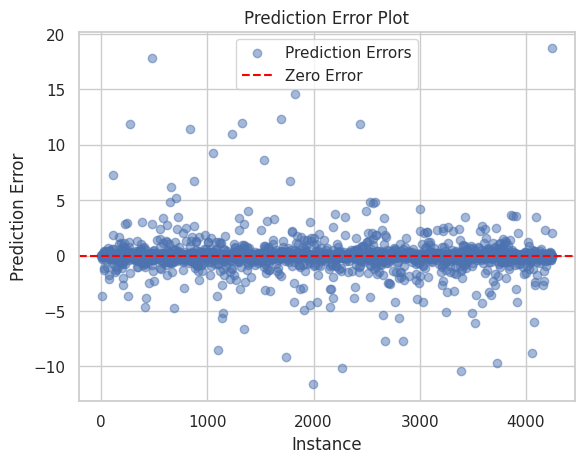

In [76]:
# Prediction error plot

errors = y_test - y_pred_rf

plt.scatter(np.arange(len(errors)), errors, label="Prediction Errors", alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Instance")
plt.ylabel("Prediction Error")
plt.title("Prediction Error Plot")
plt.legend()
plt.show()

### Kaggle Competition for Regression

In [77]:
# Read dataset
eim_test_df = pd.read_csv("EuropeanInvestmentManagement_test_regress.csv")
eim_test_df

,ticker,category,dividend_frequency,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,F00000Z0GN,USD Moderate Allocation,Quarterly,Value,Large,248.99,13.72,1.21,0.92,3.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,6,2.0
1,F00000OWP8,UK Equity Income,Annually,Value,Large,229.55,15.97,1.27,0.72,5.66,...,6.52,1.47,-2.21,4.63,-4.79,-2.60,5.64,15,8,2.0
2,0P00017OJC,Sector Equity Industrial Materials,NaN,Blend,Large,245.54,16.00,1.87,1.31,9.08,...,13.22,11.63,NaN,NaN,NaN,NaN,NaN,13,5,4.0
3,F00000V5QN,Global Emerging Markets Equity,Annually,Blend,Large,333.92,16.91,2.29,1.64,7.02,...,10.69,9.62,4.44,5.62,-13.88,-2.22,6.60,15,8,2.0
4,0P0001GYAP,Korea Equity,NaN,Value,Large,347.82,11.18,0.99,0.75,5.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,F00000OKHB,UK Flex-Cap Equity,Annually,Value,Medium,149.14,15.15,1.07,0.82,3.66,...,12.67,1.43,-1.00,7.63,-1.87,2.72,5.56,14,9,1.0
2799,0P0000M6W3,Europe Mid-Cap Equity,NaN,Blend,Medium,197.49,16.46,1.56,1.02,9.38,...,11.14,0.81,1.24,7.55,-4.21,-2.61,9.83,18,5,3.0
2800,F00000P78B,Global Flexible Bond - USD Hedged,Monthly,Value,Medium,116.43,9.68,0.30,1.12,11.10,...,5.84,9.71,3.69,3.23,2.66,-5.11,6.86,15,8,4.0
2801,0P0001CC7G,US Large-Cap Blend Equity,NaN,Blend,Large,276.72,26.39,4.09,2.46,14.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,5.0


In [78]:
# Check Missing Values

for i in eim_test_df.columns:
  print(i, ': ', eim_test_df[i].isnull().sum()/len(eim_test_df)*100, '%')

ticker :  0.0 %
category :  0.0 %
dividend_frequency :  52.729218694256154 %
equity_style :  0.0 %
equity_size :  0.0 %
equity_size_score :  0.0 %
price_prospective_earnings :  0.0 %
price_book_ratio :  0.0 %
price_sales_ratio :  0.03567606136282554 %
price_cash_flow_ratio :  0.2497324295397788 %
dividend_yield_factor :  0.0 %
historical_earnings_growth :  0.0 %
sales_growth :  0.2497324295397788 %
cash_flow_growth :  0.6064930431680342 %
book_value_growth :  0.21405636817695325 %
roa :  1.0702818408847663 %
roe :  1.2486621476988942 %
roic :  6.314662861220121 %
bond_interest_rate_sensitivity :  87.87013913663931 %
bond_credit_quality :  87.87013913663931 %
average_coupon_rate :  71.06671423474849 %
average_credit_quality :  86.90688547984303 %
modified_duration :  90.86692829111665 %
effective_maturity :  90.01070281840884 %
asset_stock :  0.0 %
asset_bond :  0.0 %
asset_cash :  0.0 %
asset_other :  0.0 %
sector_basic_materials :  13.057438458794149 %
sector_consumer_cyclical :  7.63

In [78]:
print("Rows duplicated : " + str(eim_test_df.duplicated().sum()))

In [139]:
# Missing value > 30%
drop_cols = []

for i in eim_test_df.columns:
  if (eim_test_df[i].isnull().sum()/len(eim_test_df)) > 0.3:
    drop_cols.append(i)

# Drop columns
eim_test_df = eim_test_df.drop(columns=drop_cols)
eim_test_df.shape
eim_test_df

,ticker,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,F00000Z0GN,USD Moderate Allocation,Value,Large,248.99,13.72,1.21,0.92,3.77,5.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,6,2.0
1,F00000OWP8,UK Equity Income,Value,Large,229.55,15.97,1.27,0.72,5.66,6.81,...,6.52,1.47,-2.21,4.63,-4.79,-2.60,5.64,15,8,2.0
2,0P00017OJC,Sector Equity Industrial Materials,Blend,Large,245.54,16.00,1.87,1.31,9.08,3.04,...,13.22,11.63,NaN,NaN,NaN,NaN,NaN,13,5,4.0
3,F00000V5QN,Global Emerging Markets Equity,Blend,Large,333.92,16.91,2.29,1.64,7.02,2.64,...,10.69,9.62,4.44,5.62,-13.88,-2.22,6.60,15,8,2.0
4,0P0001GYAP,Korea Equity,Value,Large,347.82,11.18,0.99,0.75,5.26,2.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,F00000OKHB,UK Flex-Cap Equity,Value,Medium,149.14,15.15,1.07,0.82,3.66,4.90,...,12.67,1.43,-1.00,7.63,-1.87,2.72,5.56,14,9,1.0
2799,0P0000M6W3,Europe Mid-Cap Equity,Blend,Medium,197.49,16.46,1.56,1.02,9.38,2.15,...,11.14,0.81,1.24,7.55,-4.21,-2.61,9.83,18,5,3.0
2800,F00000P78B,Global Flexible Bond - USD Hedged,Value,Medium,116.43,9.68,0.30,1.12,11.10,1.90,...,5.84,9.71,3.69,3.23,2.66,-5.11,6.86,15,8,4.0
2801,0P0001CC7G,US Large-Cap Blend Equity,Blend,Large,276.72,26.39,4.09,2.46,14.96,1.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,5.0


In [140]:
# Impute the remaining NaN columns using KNN for Numeric

numeric_cols = eim_test_df.select_dtypes(include='number').columns
eim_df_numeric = eim_test_df[numeric_cols]

eim_test_df[numeric_cols] = eim_test_df[numeric_cols].apply(lambda x: x.fillna(x.median()))

In [141]:
# Mengganti missing values dengan modus untuk kolom kategorikal
categorical_columns = eim_test_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    mode_value = eim_test_df[column].mode().iloc[0]  # Mengambil modus, bisa lebih dari satu jika ada
    eim_test_df[column].fillna(mode_value, inplace=True)

eim_test_df_categorical = eim_test_df[categorical_columns]
eim_test_df

,ticker,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,F00000Z0GN,USD Moderate Allocation,Value,Large,248.99,13.72,1.21,0.92,3.77,5.73,...,8.795,6.64,2.03,5.90,-5.265,-4.32,7.10,7,6,2.0
1,F00000OWP8,UK Equity Income,Value,Large,229.55,15.97,1.27,0.72,5.66,6.81,...,6.520,1.47,-2.21,4.63,-4.790,-2.60,5.64,15,8,2.0
2,0P00017OJC,Sector Equity Industrial Materials,Blend,Large,245.54,16.00,1.87,1.31,9.08,3.04,...,13.220,11.63,2.03,5.90,-5.265,-4.32,7.10,13,5,4.0
3,F00000V5QN,Global Emerging Markets Equity,Blend,Large,333.92,16.91,2.29,1.64,7.02,2.64,...,10.690,9.62,4.44,5.62,-13.880,-2.22,6.60,15,8,2.0
4,0P0001GYAP,Korea Equity,Value,Large,347.82,11.18,0.99,0.75,5.26,2.17,...,8.795,6.64,2.03,5.90,-5.265,-4.32,7.10,4,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,F00000OKHB,UK Flex-Cap Equity,Value,Medium,149.14,15.15,1.07,0.82,3.66,4.90,...,12.670,1.43,-1.00,7.63,-1.870,2.72,5.56,14,9,1.0
2799,0P0000M6W3,Europe Mid-Cap Equity,Blend,Medium,197.49,16.46,1.56,1.02,9.38,2.15,...,11.140,0.81,1.24,7.55,-4.210,-2.61,9.83,18,5,3.0
2800,F00000P78B,Global Flexible Bond - USD Hedged,Value,Medium,116.43,9.68,0.30,1.12,11.10,1.90,...,5.840,9.71,3.69,3.23,2.660,-5.11,6.86,15,8,4.0
2801,0P0001CC7G,US Large-Cap Blend Equity,Blend,Large,276.72,26.39,4.09,2.46,14.96,1.61,...,8.795,6.64,2.03,5.90,-5.265,-4.32,7.10,4,1,5.0


In [142]:
# Feature selection

eim_test_df_regress = eim_test_df.copy()

eim_test_df_regress = eim_test_df_regress.drop(columns=["ticker"])
eim_test_df_regress["category"] = le.fit_transform(eim_test_df_regress["category"]) +1
eim_test_df_regress['equity_style'] = eim_test_df_regress['equity_style'].replace({'Value': 1, 'Blend': 2, 'Growth': 3})
eim_test_df_regress['equity_size'] = eim_test_df_regress['equity_size'].replace({'Small': 10, 'Medium': 20, 'Large': 30})
eim_test_df_regress["nav_per_share_currency"] = le.fit_transform(eim_test_df_regress["nav_per_share_currency"]) +1
eim_test_df_regress["shareclass_size_currency"] = le.fit_transform(eim_test_df_regress["shareclass_size_currency"]) +1
eim_test_df_regress["fund_size_currency"] = le.fit_transform(eim_test_df_regress["fund_size_currency"]) +1
eim_test_df_regress

,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,historical_earnings_growth,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,152,1,30,248.99,13.72,1.21,0.92,3.77,5.73,-0.11,...,8.795,6.64,2.03,5.90,-5.265,-4.32,7.10,7,6,2.0
1,136,1,30,229.55,15.97,1.27,0.72,5.66,6.81,6.71,...,6.520,1.47,-2.21,4.63,-4.790,-2.60,5.64,15,8,2.0
2,117,2,30,245.54,16.00,1.87,1.31,9.08,3.04,-3.05,...,13.220,11.63,2.03,5.90,-5.265,-4.32,7.10,13,5,4.0
3,66,2,30,333.92,16.91,2.29,1.64,7.02,2.64,8.01,...,10.690,9.62,4.44,5.62,-13.880,-2.22,6.60,15,8,2.0
4,94,1,30,347.82,11.18,0.99,0.75,5.26,2.17,-15.74,...,8.795,6.64,2.03,5.90,-5.265,-4.32,7.10,4,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,137,1,20,149.14,15.15,1.07,0.82,3.66,4.90,6.36,...,12.670,1.43,-1.00,7.63,-1.870,2.72,5.56,14,9,1.0
2799,40,2,20,197.49,16.46,1.56,1.02,9.38,2.15,3.14,...,11.140,0.81,1.24,7.55,-4.210,-2.61,9.83,18,5,3.0
2800,74,1,20,116.43,9.68,0.30,1.12,11.10,1.90,-32.66,...,5.840,9.71,3.69,3.23,2.660,-5.11,6.86,15,8,4.0
2801,142,2,30,276.72,26.39,4.09,2.46,14.96,1.61,11.31,...,8.795,6.64,2.03,5.90,-5.265,-4.32,7.10,4,1,5.0


In [143]:
# Feature selection

eim_test_df_regress_selected = eim_test_df_regress[['equity_style', 'price_book_ratio', 'price_sales_ratio',
       'dividend_yield_factor', 'roa', 'roe', 'asset_stock', 'asset_bond',
       'asset_cash', 'asset_other', 'market_cap_giant', 'market_cap_large',
       'market_cap_medium', 'market_cap_small', 'market_cap_micro',
       'sustainability_rank', 'involvement_controversial_weapons',
       'involvement_palm_oil', 'involvement_small_arms',
       'fund_return_2018_q3']]
eim_test_df_regress_selected

,equity_style,price_book_ratio,price_sales_ratio,dividend_yield_factor,roa,roe,asset_stock,asset_bond,asset_cash,asset_other,market_cap_giant,market_cap_large,market_cap_medium,market_cap_small,market_cap_micro,sustainability_rank,involvement_controversial_weapons,involvement_palm_oil,involvement_small_arms,fund_return_2018_q3
0,1,1.21,0.92,5.73,6.26,18.74,51.12,37.28,11.10,0.49,35.98,35.07,22.62,5.84,0.49,3.0,0.96,0.01,0.38,3.07
1,1,1.27,0.72,6.81,5.11,18.94,98.93,0.00,0.69,0.38,36.64,30.72,21.76,10.85,0.03,2.0,2.82,0.00,2.80,-1.34
2,2,1.87,1.31,3.04,4.67,10.88,100.00,0.00,0.00,0.00,29.56,42.11,27.76,0.57,0.00,3.0,0.00,0.00,0.08,0.39
3,2,2.29,1.64,2.64,9.81,19.67,97.07,0.00,2.92,0.01,56.40,32.91,10.55,0.11,0.02,5.0,0.02,0.00,0.00,0.69
4,1,0.99,0.75,2.17,4.13,6.61,100.00,0.00,0.00,0.00,60.03,30.15,9.81,0.00,0.00,4.0,0.11,0.00,0.00,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,1,1.07,0.82,4.90,0.83,7.10,97.57,0.00,-0.01,2.45,7.92,30.01,30.94,21.15,9.98,2.0,2.16,0.00,2.16,-4.11
2799,2,1.56,1.02,2.15,5.59,13.80,99.28,0.00,0.00,0.72,0.00,42.25,57.56,0.19,0.00,5.0,0.32,0.00,0.13,2.24
2800,1,0.30,1.12,1.90,-0.46,-5.60,0.85,122.73,-30.35,6.79,0.00,0.00,50.88,40.30,8.82,3.0,0.29,0.00,0.00,1.70
2801,2,4.09,2.46,1.61,9.34,26.93,100.17,0.00,0.05,-0.22,42.21,43.87,13.86,0.06,0.00,5.0,0.00,0.00,0.00,1.54


In [144]:
# Predict

y_test_res = rf_regressor.predict(eim_test_df_regress_selected)
y_test_res

array([ 7.7462,  7.5052,  9.9128, ..., 17.21  ,  8.7731, 17.2597])

In [145]:
# Export
res = pd.DataFrame()
res['ticker'] = eim_test_df['ticker']
res['long_term_projected_earnings_growth'] = y_test_res
res.to_csv("regress_res.csv", index=False)

## Lakukan clustering pada dataset, dan berikan analisis dari jenis-jenis manajer investasi yang terdapat dalam suatu cluster! ##

In [79]:
# Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
eim_encoded = eim_df.drop(['ticker'], axis=1) # Menghapus kolom ticker karena tidak diperlukan
category_df = eim_df[['category']]

# Encoding equity_style dan equity_size
eim_encoded.loc[:, 'equity_style'] = eim_encoded['equity_style'].map({'Growth': 0, 'Value': 1, 'Blend': 2})
eim_encoded.loc[:, 'equity_size'] = eim_encoded['equity_size'].map({'Small': 0, 'Medium': 1, 'Large': 2})

cat_cols = eim_encoded.select_dtypes(include=['object']).columns.tolist() #Mengambil kolom data kategorikal
# Melakukan encoding pada masing-masing data kategorikal
for col in cat_cols:
    eim_encoded[col] = le.fit_transform(eim_encoded[col])

grouped = eim_encoded.groupby('category')




<ipython-input-79-3fcb5663c335>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  eim_encoded.loc[:, 'equity_style'] = eim_encoded['equity_style'].map({'Growth': 0, 'Value': 1, 'Blend': 2})
<ipython-input-79-3fcb5663c335>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  eim_encoded.loc[:, 'equity_size'] = eim_encoded['equity_size'].map({'Small': 0, 'Medium': 1, 'Large': 2})


In [80]:
# Feature selection

corr_matrix = eim_encoded.corr()

correlation_threshold = 0.9  # Define the correlation threshold

high_corr_features_set = set()  # Set of features with high correlation

for feature in corr_matrix.columns:
    high_corr_features = corr_matrix.index[(abs(corr_matrix[feature]) > correlation_threshold) & (corr_matrix.index != feature)]
    if len(high_corr_features) > 0:
        print("Feature:", feature)
        for high_corr_feature in high_corr_features:
            correlation_value = corr_matrix.loc[high_corr_feature, feature]
            print(f"- {high_corr_feature}: {correlation_value}")
        print()
        high_corr_features_set.update(set(high_corr_features))

high_corr_features_set = list(high_corr_features_set)
corr_columns = high_corr_features_set


X = eim_encoded[corr_columns]

Feature: equity_size_score
- market_cap_giant: 0.9072470624059648

Feature: market_cap_giant
- equity_size_score: 0.9072470624059648

Feature: social_score
- governance_score: 0.9179537884886275

Feature: governance_score
- social_score: 0.9179537884886275

Feature: sustainability_rank
- sustainability_percentage_rank: -0.9171481470648243

Feature: sustainability_percentage_rank
- sustainability_rank: -0.9171481470648243



For n_clusters = 2 The average silhouette_coefficient is : 0.5007525732867555
For n_clusters = 3 The average silhouette_coefficient is : 0.3986353587466371
For n_clusters = 4 The average silhouette_coefficient is : 0.3638698143225515
For n_clusters = 5 The average silhouette_coefficient is : 0.33583612042253225
For n_clusters = 6 The average silhouette_coefficient is : 0.3235488043524996
For n_clusters = 7 The average silhouette_coefficient is : 0.3265932917262976


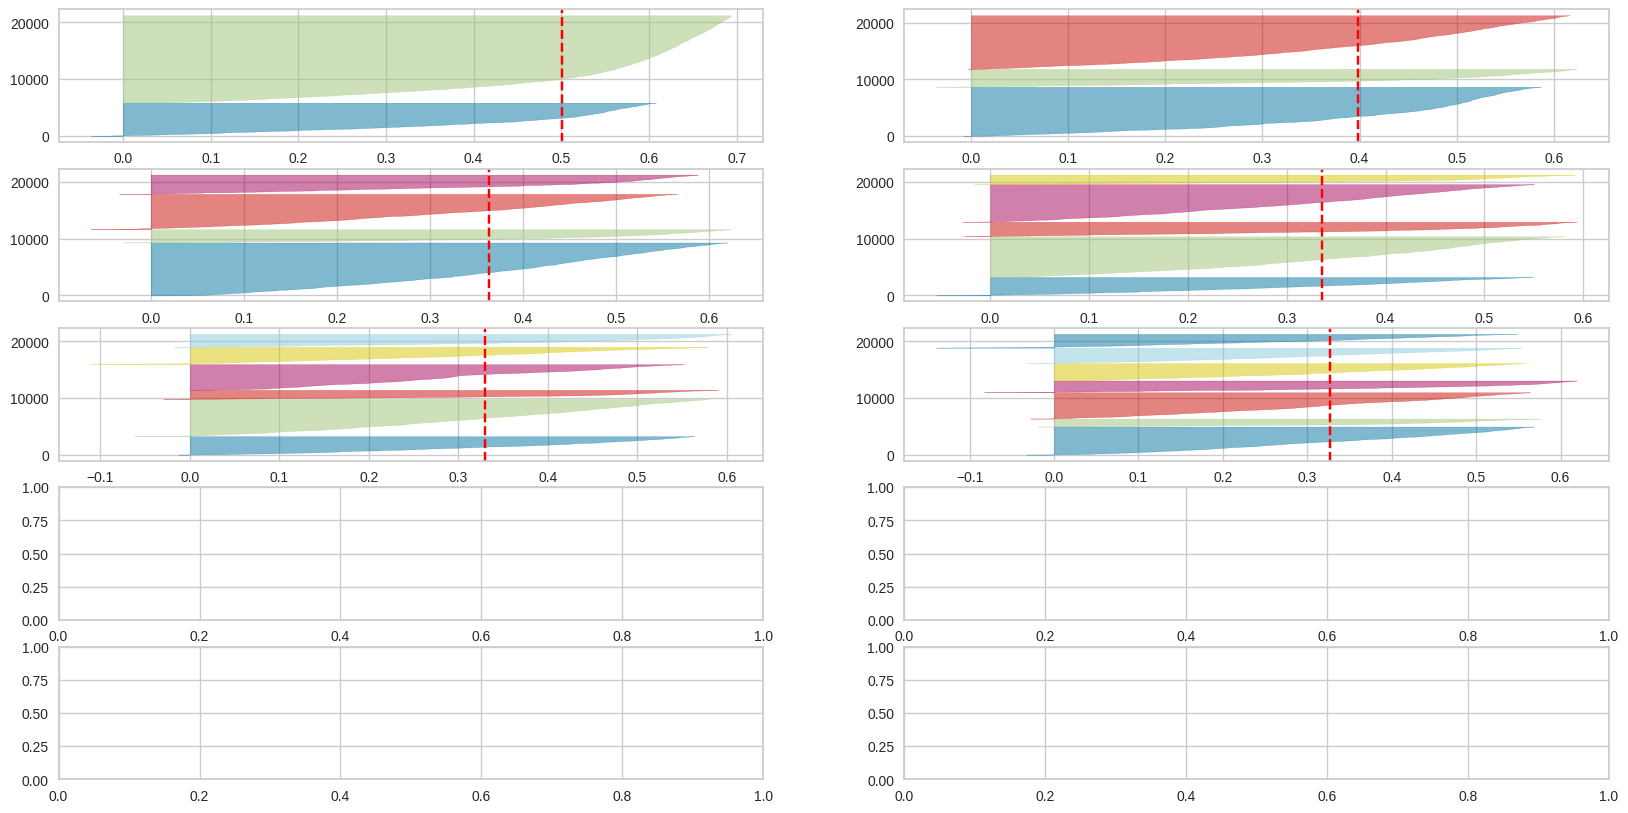

In [81]:
# K-Means Clustering

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

num_of_cluster = [2, 3, 4, 5, 6, 7,]

fig, ax = plt.subplots(5, 2, figsize=(20,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

In [82]:
# Buat model K-Means Clustering

kmeans = KMeans(n_clusters=2)

cluster_assignment = kmeans.fit_predict(X)
cluster_df = eim_df.drop(['ticker'], axis=1)
data_with_clusters = pd.DataFrame(cluster_df.copy())
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,category,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,...,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating,Clusters
0,Global Flex-Cap Equity,Value,Large,248.25,10.66,1.00,0.92,6.19,4.13,8.66,...,1.850,3.86,8.01,-8.18,-4.63,7.14,16,6,3.0,1
1,US Mid-Cap Equity,Blend,Medium,124.69,23.06,1.97,1.70,12.07,1.30,9.34,...,9.400,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0,0
2,Asia-Pacific ex-Japan Equity,Growth,Large,322.70,27.99,3.04,2.71,10.35,0.97,16.87,...,6.060,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0,1
3,US Large-Cap Blend Equity,Value,Large,229.67,17.19,1.77,0.75,6.52,2.73,7.77,...,8.100,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0,1
4,Europe Mid-Cap Equity,Growth,Medium,111.36,12.15,1.01,0.62,3.54,2.86,10.02,...,6.595,1.89,6.06,-5.40,-4.41,7.14,8,4,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22414,Property - Indirect Asia,Value,Large,214.66,14.17,0.72,3.67,9.86,4.97,3.35,...,13.050,11.02,6.22,-7.60,-6.53,6.34,15,8,3.0,0
22415,Europe ex-UK Small/Mid-Cap Equity,Growth,Small,34.41,19.31,1.60,0.94,4.75,3.66,40.12,...,0.910,2.66,8.59,-2.74,0.30,13.99,18,5,4.0,0
22416,UK Equity Income,Value,Medium,147.61,9.63,0.90,0.46,3.72,7.97,5.04,...,-5.100,-1.47,4.91,-3.77,0.77,6.85,14,9,2.0,0
22417,Global Large-Cap Blend Equity,Blend,Large,280.58,23.77,1.92,1.54,9.76,2.16,9.16,...,4.260,0.27,9.79,-6.47,-5.07,6.86,18,5,3.0,1


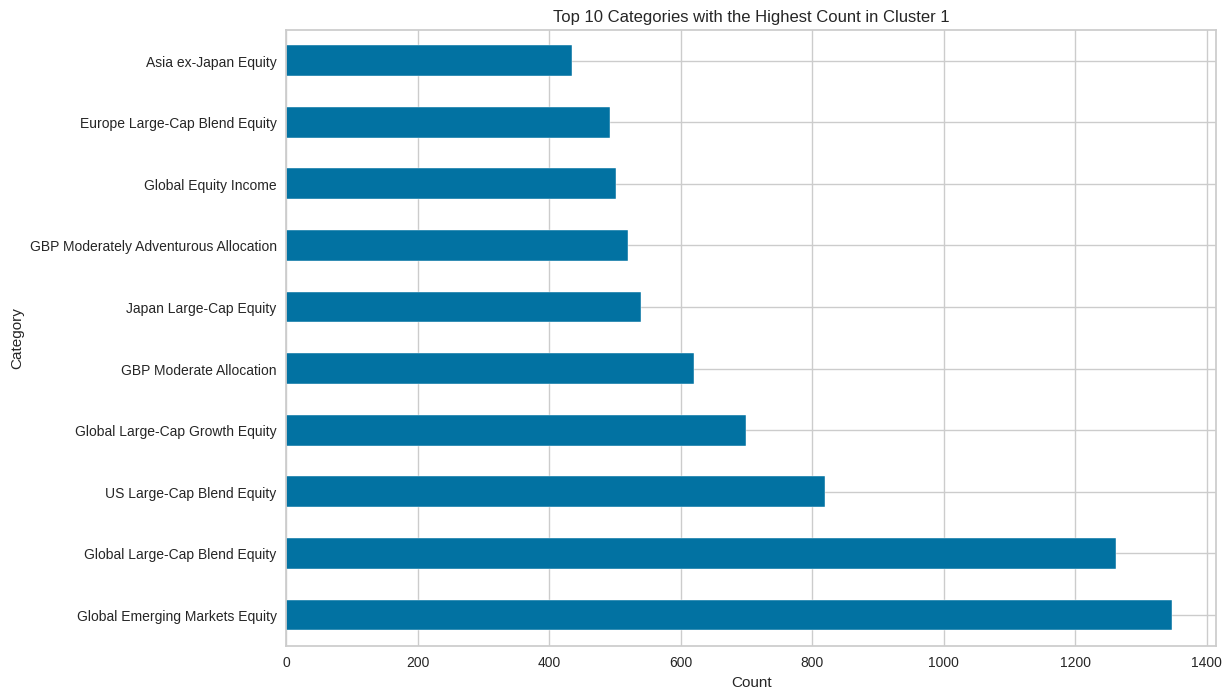

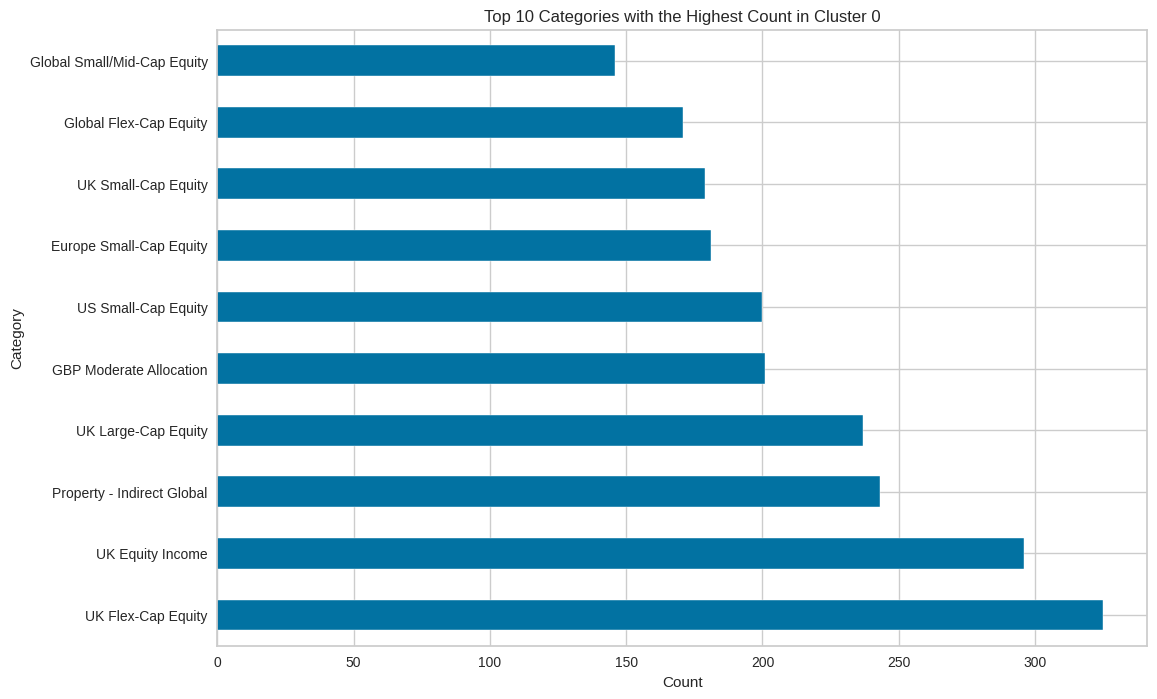

In [83]:
import matplotlib.pyplot as plt

# Group by 'Clusters' and 'category' and count the number of occurrences
cluster_category_counts = data_with_clusters.groupby(['Clusters', 'category']).size()

# For each cluster
for cluster in data_with_clusters['Clusters'].unique():
    # Select the counts for this cluster
    cluster_counts = cluster_category_counts[cluster]

    # Sort the counts in descending order and select the top 10
    top_10_categories = cluster_counts.sort_values(ascending=False).head(10)

    # Plot the counts of the top 10 categories
    top_10_categories.plot(kind='barh', figsize=(12, 8))
    plt.title(f'Top 10 Categories with the Highest Count in Cluster {cluster}')
    plt.ylabel('Category')
    plt.xlabel('Count')
    plt.show()

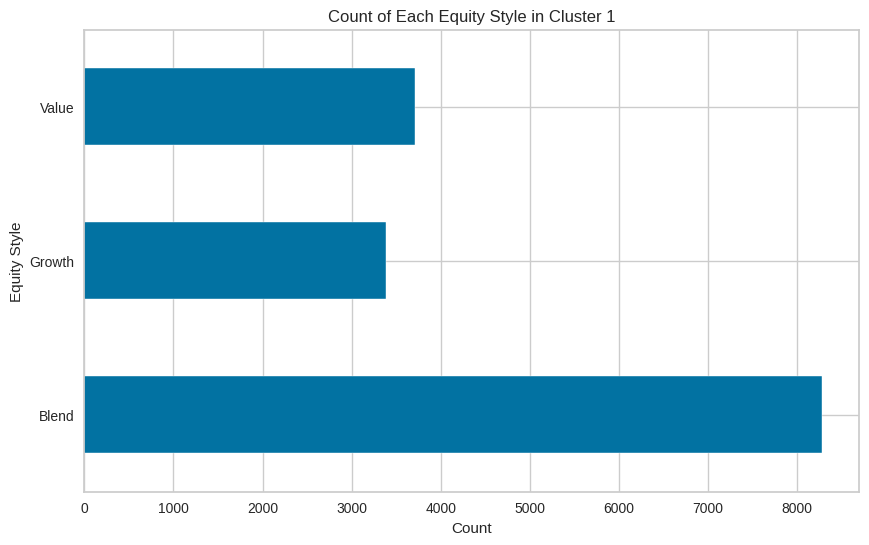

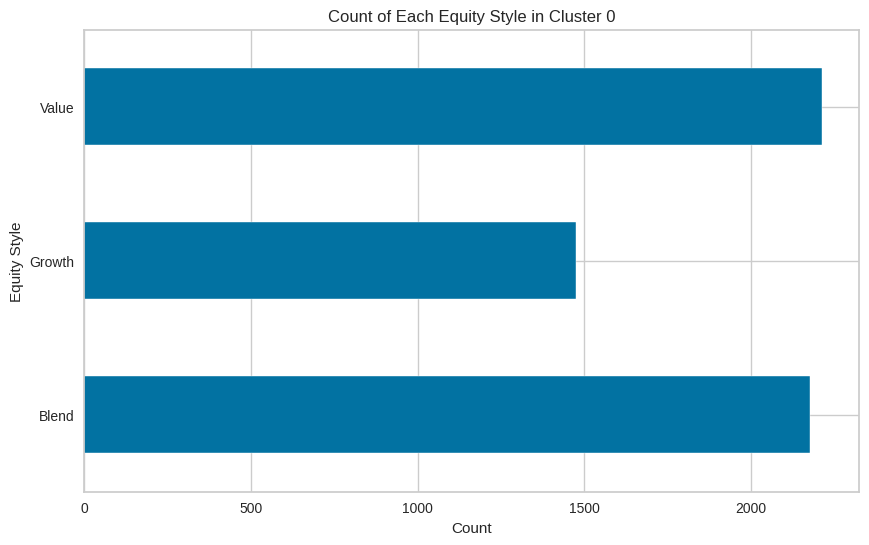

In [84]:
import matplotlib.pyplot as plt

# Group by 'Clusters' and 'equity_style' and count the number of occurrences
cluster_equity_style_counts = data_with_clusters.groupby(['Clusters', 'equity_style']).size().reset_index(name='Counts')

# For each cluster
for cluster in data_with_clusters['Clusters'].unique():
    # Select the counts for this cluster
    cluster_counts = cluster_equity_style_counts[cluster_equity_style_counts['Clusters'] == cluster]

    # Plot the counts of each 'equity_style' category
    cluster_counts.plot(kind='barh', x='equity_style', y='Counts', legend=False, figsize=(10, 6))
    plt.title(f'Count of Each Equity Style in Cluster {cluster}')
    plt.ylabel('Equity Style')
    plt.xlabel('Count')
    plt.show()

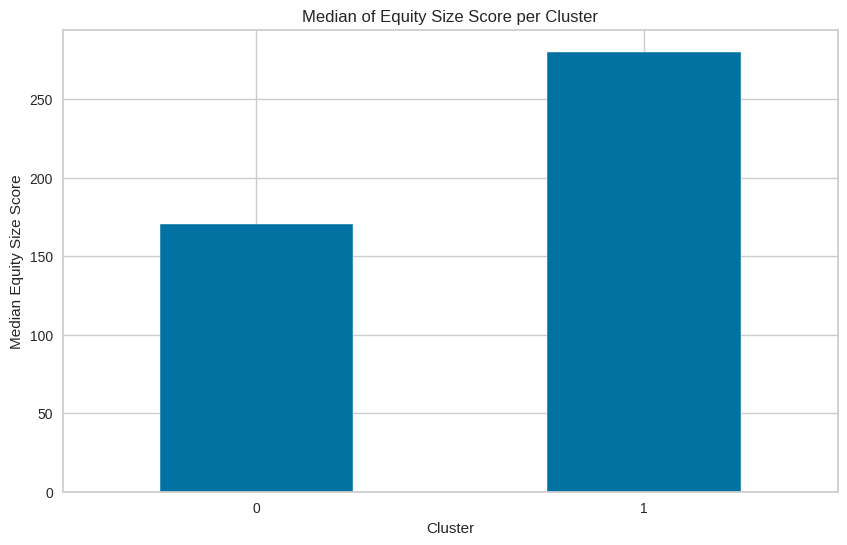

In [85]:
# Group by 'Clusters' and calculate the median of 'equity_size_score'
equity_size_score_median = data_with_clusters.groupby('Clusters')['equity_size_score'].median()

# Plot the median 'equity_size_score' for each cluster
equity_size_score_median.plot(kind='bar', figsize=(10, 6))
plt.title('Median of Equity Size Score per Cluster')
plt.xlabel('Cluster')
plt.xticks(rotation='horizontal')
plt.ylabel('Median Equity Size Score')
plt.show()

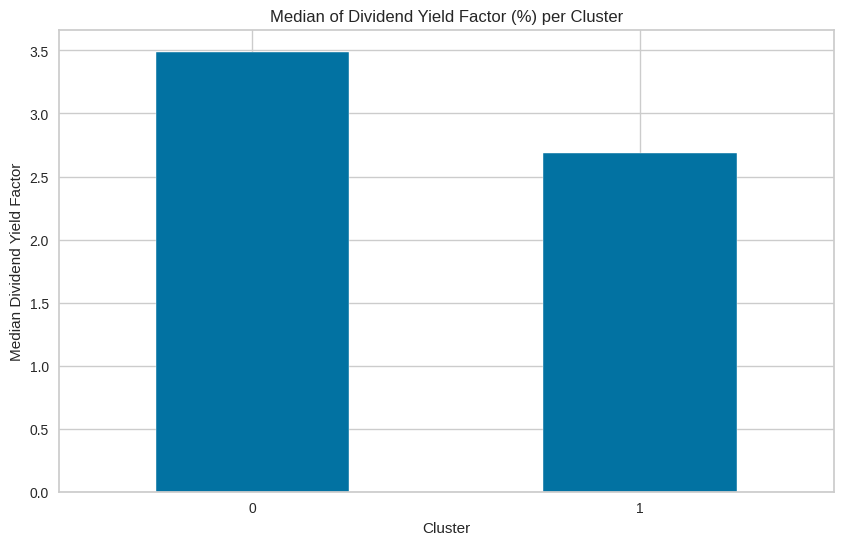

In [86]:
# Group by 'Clusters' and calculate the median of 'dividend_yield_factor'
dividend_yield_factor_median = data_with_clusters.groupby('Clusters')['dividend_yield_factor'].median()

# Plot the median 'dividend_yield_factor' for each cluster
dividend_yield_factor_median.plot(kind='bar', figsize=(10, 6))
plt.title('Median of Dividend Yield Factor (%) per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Dividend Yield Factor')
plt.xticks(rotation='horizontal')
plt.show()

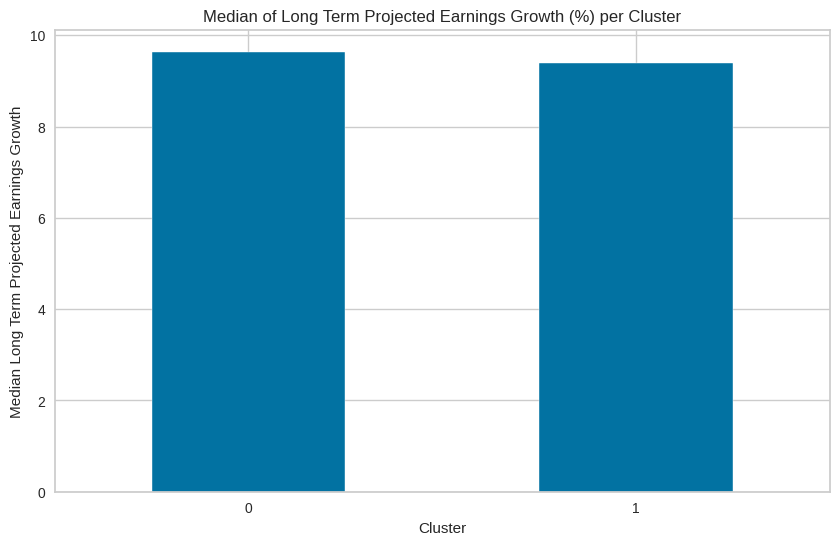

In [87]:
# Group by 'Clusters' and calculate the median of 'long_term_projected_earnings_growth'
long_term_projected_earnings_growth_median = data_with_clusters.groupby('Clusters')['long_term_projected_earnings_growth'].median()

# Plot the median 'long_term_projected_earnings_growth' for each cluster
long_term_projected_earnings_growth_median.plot(kind='bar', figsize=(10, 6))
plt.title('Median of Long Term Projected Earnings Growth (%) per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Long Term Projected Earnings Growth')
plt.xticks(rotation='horizontal')
plt.show()

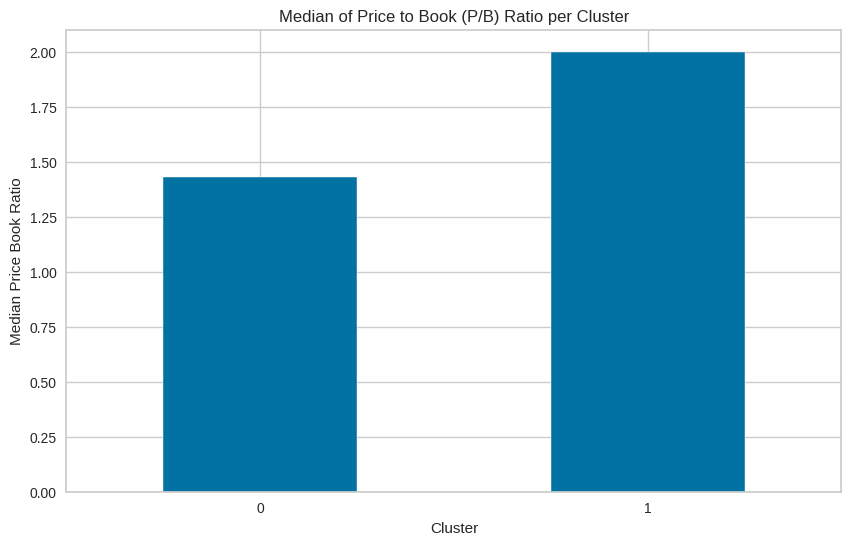

In [88]:
# Group by 'Clusters' and calculate the median of 'price_book_ratio'
price_book_ratio_median = data_with_clusters.groupby('Clusters')['price_book_ratio'].median()

# Plot the median 'price_book_ratio' for each cluster
price_book_ratio_median.plot(kind='bar', figsize=(10, 6))
plt.title('Median of Price to Book (P/B) Ratio per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Price Book Ratio')
plt.xticks(rotation='horizontal')
plt.show()